# Honda Workshop Notebook

About me:
  * Franz Beier, 34 years old, living in Leipzig
  * I'm a physicist, worked in the field of lasers for years in large labs with lots of data
  * My everyday work were physical simulation, measurements of all kind of effects and equipment
  * Freelancer now and work most times in data science projects for customers
  * On the side I'm giving workshops on topics I'm involved in on a daily basis

# Hints and Shortcuts
* https://pandas.pydata.org/docs/index.html
* https://jakevdp.github.io/PythonDataScienceHandbook/
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

# Topics
* Loading and customizing data sets from different sources.  
* Data structures: Array, List, Series and DataFrame  
* Basic insights and manipulations of datasets:  
  * Simple Statistics  
  * Querying and Sorting  
  * Grouping and Aggregating  
  * Data Cleaning, Invalid Values  
* Time optimization data processing  
* Views vs. Copies  
* Plotting with Matplotlib  
  * Diagram types  
  * Styling  
* Time Series
* Real life examples and projects
* pandas with seaborn
* pandas with scikit learn


**For those of you that are new to Jupyter Notebooks:**

Code Cell $a=1$

In [4]:
1+1

2

Markdown Cell:

# pandas

## Data Frame creation and Data Importing

[Colab Notebook Workshop](https://drive.google.com/file/d/1h-2Q10b6Mh2pmQrvSoqKZUUHCQjIWUyg/view?usp=sharing)

Code Cell

In [5]:
! pip install pandas
! pip install numpy

In [1]:
import pandas as pd
import numpy as np

To start on the same level:

In [2]:
mylist = [1, 2, 3, 4, 'a', 4]
mydict = {'Hong Kong': 12, 'Leipzig': 14}
myset = {10, 'elf', 11, 12, 13, 13}
my_array = np.array(mylist)

In [3]:
my_array

array(['1', '2', '3', '4', 'a', '4'], dtype='<U21')

In [4]:
myset

{10, 11, 12, 13, 'elf'}

In [3]:
my_array

array(['1', '2', '3', '4', 'a', '4'], dtype='<U21')

In [11]:
myset

{10, 11, 12, 13, 'elf'}

## ```Series``` and ```DataFrames```

Two basic data structures in pandas:
* ```Series```
* ```DataFrame```

### pandas ```Series```

extended array structure, can be created from lists and numpy arrays as well

**Series and DataFrames are ordered**

In [12]:
pd.Series([5, 3, 1, 12, 543, 'asdthydthdyhg'])

0                5
1                3
2                1
3               12
4              543
5    asdthydthdyhg
dtype: object

In [13]:
pd.Series(np.array([0.5, 0.3, 1, 12, 543]))

0      0.5
1      0.3
2      1.0
3     12.0
4    543.0
dtype: float64

automatisches casten:

In [14]:
data = pd.Series([0.5, 0.3, 1, 12, 543], index = ['a', 'b', 'c', 'd', 'e'])
data

a      0.5
b      0.3
c      1.0
d     12.0
e    543.0
dtype: float64

Data access:

In [15]:
data['a']

0.5

In [16]:
data[-1]

543.0

but be careful with non sequential indizes:

In [17]:
data = pd.Series([0.5, 0.3, 1, 12, 543], index = [-1, -2, 4, 3, 2])
data

-1      0.5
-2      0.3
 4      1.0
 3     12.0
 2    543.0
dtype: float64

Data access:

In [18]:
data[-1]

0.5

#### Different Datatypes

In [19]:
my_list = [1, 2, 'a', 5, 34, 3563456]

In [20]:
pd.Series(my_list)

0          1
1          2
2          a
3          5
4         34
5    3563456
dtype: object

#### ```Series``` created from a dictionary

In [21]:
annual_power_comsumption = {'China': 7500000,
                            'United States': 3989566,
                            'Germany': 524268,
                            'Bitcoin': 177000,
                            'Sweden': 131798}

consumption_series = pd.Series(annual_power_comsumption)
consumption_series

China            7500000
United States    3989566
Germany           524268
Bitcoin           177000
Sweden            131798
dtype: int64

In comparison to dict, Series supports slicing:

In [22]:
consumption_series['Germany':'Sweden']

Germany    524268
Bitcoin    177000
Sweden     131798
dtype: int64

#### ```Series```stores also Metadata from additional dict:

In [23]:
consumption_series.attrs = {'a':1}

<div class="alert alert-block alert-info"><b>Info: </b> .attrs only accepts a dict. </div> 

In [25]:
consumption_series.attrs['a']

1

## DataFrame 

Another fundamental data structure is the ```pandas``` ```DataFrame```

It joins several Series to a table like structure. We add another ```dict``` and ```Series``` to the notebook:

In [26]:
population = {'China': 1411780000,
              'United States': 328200000,
              'Germany': 83200000,
              'Bitcoin': np.nan,
              'Sweden': 10285450}

In [27]:
population_series = pd.Series(population)
population_series

China            1.411780e+09
United States    3.282000e+08
Germany          8.320000e+07
Bitcoin                   NaN
Sweden           1.028545e+07
dtype: float64

In [28]:
df = pd.DataFrame({'consumption': consumption_series,
                   'population': population_series})

In [29]:
df

consumption    population
China              7500000  1.411780e+09
United States      3989566  3.282000e+08
Germany             524268  8.320000e+07
Bitcoin             177000           NaN
Sweden              131798  1.028545e+07

<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
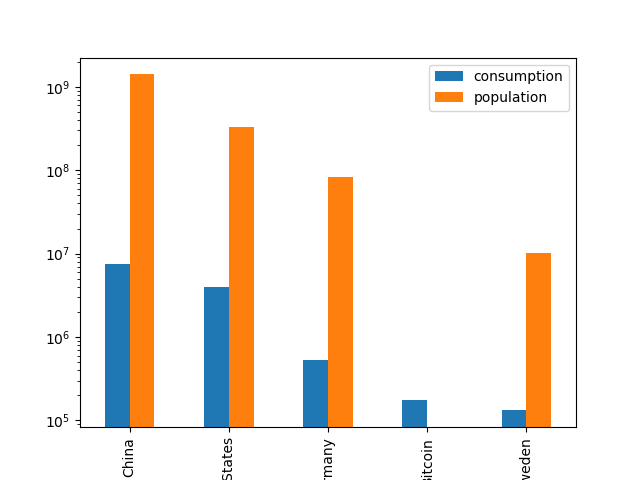

In [31]:
%matplotlib widget
df.plot.bar(logy=True)

In [33]:
list(df.index)

['China', 'United States', 'Germany', 'Bitcoin', 'Sweden']

Access the ```DataFrame``` data as in a dictionary:

But also constructable from single series with an ```columns``` attribute:

In [34]:
pd.DataFrame(consumption_series, columns=['consumption'])

consumption
China              7500000
United States      3989566
Germany             524268
Bitcoin             177000
Sweden              131798

### Indexing and Data Selection in ```Series``` and ```DataFrame```

As already shown:

In [35]:
consumption_series['United States']

3989566

Same for ```DataFrames``` but column wise

In [36]:
df['consumption']

China            7500000
United States    3989566
Germany           524268
Bitcoin           177000
Sweden            131798
Name: consumption, dtype: int64

and chained selection:

In [37]:
df.consumption

China            7500000
United States    3989566
Germany           524268
Bitcoin           177000
Sweden            131798
Name: consumption, dtype: int64

Be careful doing that! Doesn't work in case of non-string column names or columns that are named like ```DataFrame```methods like ```fillna()```

In [38]:
df['consumption']['United States']

3989566

Short workaround:

In [39]:
from enum import Enum

In [40]:
class EnergyEnum(str, Enum):
  coal = 'coal'
  wind = 'wind'
  pv = 'pv'

In [42]:
'coal' == EnergyEnum.coal

True

But also an Access by fancy indexing is possible py passing a list:

In [43]:
df

consumption    population
China              7500000  1.411780e+09
United States      3989566  3.282000e+08
Germany             524268  8.320000e+07
Bitcoin             177000           NaN
Sweden              131798  1.028545e+07

In [44]:
df['consumption'][['United States', 'Germany']]

United States    3989566
Germany           524268
Name: consumption, dtype: int64

In [45]:
consumption_series[consumption_series>1750000]

China            7500000
United States    3989566
dtype: int64

In [46]:
consumption_series>1750000

China             True
United States     True
Germany          False
Bitcoin          False
Sweden           False
dtype: bool

**But chained comparison isn't working:**

In [47]:
consumption_series[(12>consumption_series>1750000)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Chain it by bitwise operators

In [48]:
consumption_series[(consumption_series>1750000) | (consumption_series<300000)]

China            7500000
United States    3989566
Bitcoin           177000
Sweden            131798
dtype: int64

In [49]:
bool_list = consumption_series>1750000
bool_list

China             True
United States     True
Germany          False
Bitcoin          False
Sweden           False
dtype: bool

Why is this working at all?

In [50]:
consumption_series[bool_list]

China            7500000
United States    3989566
dtype: int64

#### ```loc```, ```iloc``` for data selection

example series:

In [51]:
pd.Timestamp('2021-05-01').tz_localize('Europe/Berlin')

Timestamp('2021-05-01 00:00:00+0200', tz='Europe/Berlin')

In [53]:
idx = pd.date_range("2022-01-01", periods=12, freq="D")

In [54]:
idx

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12'],
              dtype='datetime64[ns]', freq='D')

In [55]:
idx = pd.date_range("2022-01-01", periods=12, freq="D")

time_series = pd.Series(range(len(idx)), index=idx)
time_series

2022-01-01     0
2022-01-02     1
2022-01-03     2
2022-01-04     3
2022-01-05     4
2022-01-06     5
2022-01-07     6
2022-01-08     7
2022-01-09     8
2022-01-10     9
2022-01-11    10
2022-01-12    11
Freq: D, dtype: int64

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

#### ```loc```

In [58]:
time_series.loc['2022-01-01': '2022-01-09']

2022-01-01    0
2022-01-02    1
2022-01-03    2
2022-01-04    3
2022-01-05    4
2022-01-06    5
2022-01-07    6
2022-01-08    7
2022-01-09    8
Freq: D, dtype: int64

#### ```iloc```

In [57]:
time_series.iloc[1:8]

2022-01-02    1
2022-01-03    2
2022-01-04    3
2022-01-05    4
2022-01-06    5
2022-01-07    6
2022-01-08    7
Freq: D, dtype: int64

Note: Exclusive and inclusive end

#### Same for ```DataFrame```

Easily access the data directly in chained notation:

In [59]:
df['consumption']['China']

7500000

But use the reversed order with loc

In [60]:
df.loc['China', 'consumption']

7500000

In [61]:
df[df.consumption>1750000][ 'population']

China            1.411780e+09
United States    3.282000e+08
Name: population, dtype: float64

In [62]:
df.iloc[:2, :3]

consumption    population
China              7500000  1.411780e+09
United States      3989566  3.282000e+08

In [63]:
df

consumption    population
China              7500000  1.411780e+09
United States      3989566  3.282000e+08
Germany             524268  8.320000e+07
Bitcoin             177000           NaN
Sweden              131798  1.028545e+07

## Working on Data in DataFrames and Series

### Set Data Manually

In [64]:
import pandas as pd
df = pd.DataFrame({'consumption': consumption_series,
                   'population': population_series})

In [65]:
df

consumption    population
China              7500000  1.411780e+09
United States      3989566  3.282000e+08
Germany             524268  8.320000e+07
Bitcoin             177000           NaN
Sweden              131798  1.028545e+07

In [66]:
df.loc['Bitcoin', 'population'] = 0

Row comes first!

In [67]:
df

consumption    population
China              7500000  1.411780e+09
United States      3989566  3.282000e+08
Germany             524268  8.320000e+07
Bitcoin             177000  0.000000e+00
Sweden              131798  1.028545e+07

In [68]:
df.population.astype(int)

China            1411780000
United States     328200000
Germany            83200000
Bitcoin                   0
Sweden             10285450
Name: population, dtype: int64

### Universal Functions

Universal functions can also be applied to the whole ```DataFrame``` or to seperate ```Serie```.

In [71]:
consumption_series+4

China            7500004
United States    3989570
Germany           524272
Bitcoin           177004
Sweden            131802
dtype: int64

New ```DataFrame``` to work with smaller numbers: 

In [72]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(1)
random_series = pd.Series(rng.randint(0, 20, 3))

random_df = pd.DataFrame(rng.randint(0, 20, (3, 6)),
                  columns=['A', 'B', 'C', 'D', 'E', 'F'])

In [73]:
random_series

0     5
1    11
2    12
dtype: int64

In [74]:
random_df

A  B   C   D   E   F
0   8  9  11   5  15   0
1  16  1  12   7  13   6
2  18  5  18  11  10  14

In [75]:
random_series**2

0     25
1    121
2    144
dtype: int64

In [76]:
np.sin(random_df)

A         B         C         D         E         F
0  0.989358  0.412118 -0.999990 -0.958924  0.650288  0.000000
1 -0.287903  0.841471 -0.536573  0.656987  0.420167 -0.279415
2 -0.750987 -0.958924 -0.750987 -0.999990 -0.544021  0.990607

In [77]:
np.exp(random_df)

A            B             C             D             E  \
0  2.980958e+03  8103.083928  5.987414e+04    148.413159  3.269017e+06   
1  8.886111e+06     2.718282  1.627548e+05   1096.633158  4.424134e+05   
2  6.565997e+07   148.413159  6.565997e+07  59874.141715  2.202647e+04   

              F  
0  1.000000e+00  
1  4.034288e+02  
2  1.202604e+06

Set a new column with data:

In [78]:
random_df['new_column'] = np.sqrt(12*np.pi*random_df['C'])
random_df

A  B   C   D   E   F  new_column
0   8  9  11   5  15   0   20.363944
1  16  1  12   7  13   6   21.269446
2  18  5  18  11  10  14   26.049645

Back to the energy-consumption ```DataFrame```

Back to the consumption df

In [79]:
df

consumption    population
China              7500000  1.411780e+09
United States      3989566  3.282000e+08
Germany             524268  8.320000e+07
Bitcoin             177000  0.000000e+00
Sweden              131798  1.028545e+07

In [80]:
df['relative_consumption'] = df.consumption/df.population

In [81]:
df

consumption    population  relative_consumption
China              7500000  1.411780e+09              0.005312
United States      3989566  3.282000e+08              0.012156
Germany             524268  8.320000e+07              0.006301
Bitcoin             177000  0.000000e+00                   inf
Sweden              131798  1.028545e+07              0.012814

### Apply

Setting ```DataFrame``` values manually is very uncomfortable, universal functions are not working in every case

In [84]:
random_df.apply(np.sum, axis=1)

0     68.363944
1     76.269446
2    102.049645
dtype: float64

Also possible with ```lambda```:

In [85]:
random_df

A  B   C   D   E   F  new_column
0   8  9  11   5  15   0   20.363944
1  16  1  12   7  13   6   21.269446
2  18  5  18  11  10  14   26.049645

In [86]:
random_df.apply(lambda x: x**2-x+10)

A   B    C    D    E    F  new_column
0   66  82  120   30  220   10  404.326286
1  250  10  142   52  166   40  441.119896
2  316  30  316  120  100  192  662.534368

More complicated example: 
* We store data for a computation problem in a DataFrame
* We want to store the result of a computation for every dataset
* Imagine two lines in the form $y = m_i \cdot x + n_i$,
    crossing somehow
* We store the parameters of both lines in DataFrame

In [87]:
import numpy as np

def determine_intersection(args):
    m1, n1, m2, n2, *args = args
    factor_matrix = np.array([[m1, -1],
                              [m2, -1]])
    result_vector = np.array([-n1, -n2])
    
    try:
        result = np.linalg.solve(factor_matrix, result_vector)
    except Exception as e:
        result = [None, None]
    return result

In [90]:
determine_intersection((1,0,-1,-1))

array([-0.5, -0.5])

Beispielmatrix neu:

In [91]:
line_df = pd.DataFrame(rng.randint(-10, 10, (12, 4)),
                       columns=['m1', 'n1', 'm2', 'n2'])
line_df

m1  n1  m2  n2
0    8  -6  -1   7
1  -10   3  -1  -1
2   -3  -9 -10   7
3   -2   3   9   5
4    0  -2  -3  -7
5   -4   7  -7  -6
6    7   1   2   6
7    3   9  -1   8
8    5 -10  -6   5
9   -8  -3  -2  -1
10  -7  -3  -6  -5
11   9  -4  -2 -10

In [94]:
line_df['example_x'] = [np.arange(-10,10,0.1) for i in range(line_df.shape[0])]

In [96]:
line_df

m1  n1  m2  n2                                          example_x
0    8  -6  -1   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
1  -10   3  -1  -1  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
2   -3  -9 -10   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
3   -2   3   9   5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
4    0  -2  -3  -7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
5   -4   7  -7  -6  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
6    7   1   2   6  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
7    3   9  -1   8  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
8    5 -10  -6   5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
9   -8  -3  -2  -1  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
10  -7  -3  -6  -5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
11   9  -4  -2 -10  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...

In [95]:
line_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   m1         12 non-null     int64 
 1   n1         12 non-null     int64 
 2   m2         12 non-null     int64 
 3   n2         12 non-null     int64 
 4   example_x  12 non-null     object
dtypes: int64(4), object(1)
memory usage: 608.0+ bytes


In [97]:
line_df.head()

m1  n1  m2  n2                                          example_x
0   8  -6  -1   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
1 -10   3  -1  -1  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
2  -3  -9 -10   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
3  -2   3   9   5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...
4   0  -2  -3  -7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...

In [100]:
line_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   m1         12 non-null     int64 
 1   n1         12 non-null     int64 
 2   m2         12 non-null     int64 
 3   n2         12 non-null     int64 
 4   example_x  12 non-null     object
dtypes: int64(4), object(1)
memory usage: 608.0+ bytes


In [101]:
line_df['example_y1'] = line_df['example_x']
line_df['example_y2'] = line_df['example_x']

list_y1 = []
list_y2 = []

for i in range(line_df.shape[0]):
    list_y1.append(line_df.loc[i,'example_x']*line_df.loc[i,'m1'] + line_df.loc[i,'n1'])
    list_y2.append(line_df.loc[i,'example_x']*line_df.loc[i,'m2'] + line_df.loc[i,'n2'])
    
line_df['example_y1'] = list_y1
line_df['example_y2'] = list_y2

In [102]:
line_df.head()

m1  n1  m2  n2                                          example_x  \
0   8  -6  -1   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
1 -10   3  -1  -1  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
2  -3  -9 -10   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
3  -2   3   9   5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
4   0  -2  -3  -7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   

                                          example_y1  \
0  [-86.0, -85.2, -84.4, -83.60000000000001, -82....   
1  [103.0, 102.0, 101.0, 100.00000000000001, 99.0...   
2  [21.0, 20.700000000000003, 20.400000000000002,...   
3  [23.0, 22.8, 22.6, 22.400000000000002, 22.2000...   
4  [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....   

                                          example_y2  
0  [17.0, 16.9, 16.8, 16.700000000000003, 16.6, 1...  
1  [9.0, 8.9, 8.8, 8.700000000000001, 8.600000000...  
2  [107.0, 106.0, 105.0, 104.00000000000001, 103....  
3  [-85.0, -84.10000000000001, -83.2, -82.3000000...  
4  [23.0, 22.700000000000003, 22.400000000000002,...

plotting possible with stored data

In [103]:
line_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   m1          12 non-null     int64 
 1   n1          12 non-null     int64 
 2   m2          12 non-null     int64 
 3   n2          12 non-null     int64 
 4   example_x   12 non-null     object
 5   example_y1  12 non-null     object
 6   example_y2  12 non-null     object
dtypes: int64(4), object(3)
memory usage: 800.0+ bytes


In [104]:
line_df.apply(determine_intersection, axis=1)

0        [1.4444444444444444, 5.555555555555555]
1      [0.4444444444444445, -1.4444444444444444]
2      [2.2857142857142856, -15.857142857142858]
3       [-0.1818181818181819, 3.363636363636363]
4                    [-1.6666666666666667, -2.0]
5       [-4.333333333333333, 24.333333333333332]
6                                     [1.0, 8.0]
7                                  [-0.25, 8.25]
8       [1.3636363636363635, -3.181818181818181]
9     [-0.3333333333333333, -0.3333333333333333]
10     [1.9999999999999996, -16.999999999999996]
11     [-0.5454545454545454, -8.909090909090908]
dtype: object

In [105]:
line_df['intersection_x'], line_df['intersection_y'] = zip(*line_df.apply(determine_intersection, axis=1))

In [106]:
line_df

m1  n1  m2  n2                                          example_x  \
0    8  -6  -1   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
1  -10   3  -1  -1  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
2   -3  -9 -10   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
3   -2   3   9   5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
4    0  -2  -3  -7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
5   -4   7  -7  -6  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
6    7   1   2   6  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
7    3   9  -1   8  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
8    5 -10  -6   5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
9   -8  -3  -2  -1  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
10  -7  -3  -6  -5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
11   9  -4  -2 -10  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   

                                           example_y1  \
0   [-86.0, -85.2, -84.4, -83.60000000000001, -82....   
1   [103.0, 102.0, 101.0, 100.00000000000001, 99.0...   
2   [21.0, 20.700000000000003, 20.400000000000002,...   
3   [23.0, 22.8, 22.6, 22.400000000000002, 22.2000...   
4   [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....   
5   [47.0, 46.6, 46.2, 45.800000000000004, 45.4000...   
6   [-69.0, -68.3, -67.60000000000001, -66.9, -66....   
7   [-21.0, -20.700000000000003, -20.4000000000000...   
8   [-60.0, -59.5, -59.0, -58.50000000000001, -58....   
9   [77.0, 76.2, 75.4, 74.60000000000001, 73.80000...   
10  [67.0, 66.3, 65.60000000000001, 64.9, 64.20000...   
11  [-94.0, -93.10000000000001, -92.2, -91.3000000...   

                                           example_y2  intersection_x  \
0   [17.0, 16.9, 16.8, 16.700000000000003, 16.6, 1...        1.444444   
1   [9.0, 8.9, 8.8, 8.700000000000001, 8.600000000...        0.444444   
2   [107.0, 106.0, 105.0, 104.00000000000001, 103....        2.285714   
3   [-85.0, -84.10000000000001, -83.2, -82.3000000...       -0.181818   
4   [23.0, 22.700000000000003, 22.400000000000002,...       -1.666667   
5   [64.0, 63.3, 62.60000000000001, 61.90000000000...       -4.333333   
6   [-14.0, -13.8, -13.600000000000001, -13.400000...        1.000000   
7   [18.0, 17.9, 17.8, 17.700000000000003, 17.6, 1...       -0.250000   
8   [65.0, 64.4, 63.800000000000004, 63.2, 62.6000...        1.363636   
9   [19.0, 18.8, 18.6, 18.400000000000002, 18.2000...       -0.333333   
10  [55.0, 54.400000000000006, 53.800000000000004,...        2.000000   
11  [10.0, 9.8, 9.600000000000001, 9.4000000000000...       -0.545455   

    intersection_y  
0         5.555556  
1        -1.444444  
2       -15.857143  
3         3.363636  
4        -2.000000  
5        24.333333  
6         8.000000  
7         8.250000  
8        -3.181818  
9        -0.333333  
10      -17.000000  
11       -8.909091

In [107]:
line_df['intersection'] = line_df.apply(determine_intersection, axis=1)

In [108]:
line_df

m1  n1  m2  n2                                          example_x  \
0    8  -6  -1   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
1  -10   3  -1  -1  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
2   -3  -9 -10   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
3   -2   3   9   5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
4    0  -2  -3  -7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
5   -4   7  -7  -6  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
6    7   1   2   6  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
7    3   9  -1   8  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
8    5 -10  -6   5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
9   -8  -3  -2  -1  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
10  -7  -3  -6  -5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
11   9  -4  -2 -10  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   

                                           example_y1  \
0   [-86.0, -85.2, -84.4, -83.60000000000001, -82....   
1   [103.0, 102.0, 101.0, 100.00000000000001, 99.0...   
2   [21.0, 20.700000000000003, 20.400000000000002,...   
3   [23.0, 22.8, 22.6, 22.400000000000002, 22.2000...   
4   [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....   
5   [47.0, 46.6, 46.2, 45.800000000000004, 45.4000...   
6   [-69.0, -68.3, -67.60000000000001, -66.9, -66....   
7   [-21.0, -20.700000000000003, -20.4000000000000...   
8   [-60.0, -59.5, -59.0, -58.50000000000001, -58....   
9   [77.0, 76.2, 75.4, 74.60000000000001, 73.80000...   
10  [67.0, 66.3, 65.60000000000001, 64.9, 64.20000...   
11  [-94.0, -93.10000000000001, -92.2, -91.3000000...   

                                           example_y2  intersection_x  \
0   [17.0, 16.9, 16.8, 16.700000000000003, 16.6, 1...        1.444444   
1   [9.0, 8.9, 8.8, 8.700000000000001, 8.600000000...        0.444444   
2   [107.0, 106.0, 105.0, 104.00000000000001, 103....        2.285714   
3   [-85.0, -84.10000000000001, -83.2, -82.3000000...       -0.181818   
4   [23.0, 22.700000000000003, 22.400000000000002,...       -1.666667   
5   [64.0, 63.3, 62.60000000000001, 61.90000000000...       -4.333333   
6   [-14.0, -13.8, -13.600000000000001, -13.400000...        1.000000   
7   [18.0, 17.9, 17.8, 17.700000000000003, 17.6, 1...       -0.250000   
8   [65.0, 64.4, 63.800000000000004, 63.2, 62.6000...        1.363636   
9   [19.0, 18.8, 18.6, 18.400000000000002, 18.2000...       -0.333333   
10  [55.0, 54.400000000000006, 53.800000000000004,...        2.000000   
11  [10.0, 9.8, 9.600000000000001, 9.4000000000000...       -0.545455   

    intersection_y                                intersection  
0         5.555556     [1.4444444444444444, 5.555555555555555]  
1        -1.444444   [0.4444444444444445, -1.4444444444444444]  
2       -15.857143   [2.2857142857142856, -15.857142857142858]  
3         3.363636    [-0.1818181818181819, 3.363636363636363]  
4        -2.000000                 [-1.6666666666666667, -2.0]  
5        24.333333    [-4.333333333333333, 24.333333333333332]  
6         8.000000                                  [1.0, 8.0]  
7         8.250000                               [-0.25, 8.25]  
8        -3.181818    [1.3636363636363635, -3.181818181818181]  
9        -0.333333  [-0.3333333333333333, -0.3333333333333333]  
10      -17.000000   [1.9999999999999996, -16.999999999999996]  
11       -8.909091   [-0.5454545454545454, -8.909090909090908]

You could ask now: Why should anybody use this instead of usual for loops

### What's the fastest way to operate on data with ```pandas```?

In [109]:
line_df

m1  n1  m2  n2                                          example_x  \
0    8  -6  -1   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
1  -10   3  -1  -1  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
2   -3  -9 -10   7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
3   -2   3   9   5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
4    0  -2  -3  -7  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
5   -4   7  -7  -6  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
6    7   1   2   6  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
7    3   9  -1   8  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
8    5 -10  -6   5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
9   -8  -3  -2  -1  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
10  -7  -3  -6  -5  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   
11   9  -4  -2 -10  [-10.0, -9.9, -9.8, -9.700000000000001, -9.600...   

                                           example_y1  \
0   [-86.0, -85.2, -84.4, -83.60000000000001, -82....   
1   [103.0, 102.0, 101.0, 100.00000000000001, 99.0...   
2   [21.0, 20.700000000000003, 20.400000000000002,...   
3   [23.0, 22.8, 22.6, 22.400000000000002, 22.2000...   
4   [-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2....   
5   [47.0, 46.6, 46.2, 45.800000000000004, 45.4000...   
6   [-69.0, -68.3, -67.60000000000001, -66.9, -66....   
7   [-21.0, -20.700000000000003, -20.4000000000000...   
8   [-60.0, -59.5, -59.0, -58.50000000000001, -58....   
9   [77.0, 76.2, 75.4, 74.60000000000001, 73.80000...   
10  [67.0, 66.3, 65.60000000000001, 64.9, 64.20000...   
11  [-94.0, -93.10000000000001, -92.2, -91.3000000...   

                                           example_y2  intersection_x  \
0   [17.0, 16.9, 16.8, 16.700000000000003, 16.6, 1...        1.444444   
1   [9.0, 8.9, 8.8, 8.700000000000001, 8.600000000...        0.444444   
2   [107.0, 106.0, 105.0, 104.00000000000001, 103....        2.285714   
3   [-85.0, -84.10000000000001, -83.2, -82.3000000...       -0.181818   
4   [23.0, 22.700000000000003, 22.400000000000002,...       -1.666667   
5   [64.0, 63.3, 62.60000000000001, 61.90000000000...       -4.333333   
6   [-14.0, -13.8, -13.600000000000001, -13.400000...        1.000000   
7   [18.0, 17.9, 17.8, 17.700000000000003, 17.6, 1...       -0.250000   
8   [65.0, 64.4, 63.800000000000004, 63.2, 62.6000...        1.363636   
9   [19.0, 18.8, 18.6, 18.400000000000002, 18.2000...       -0.333333   
10  [55.0, 54.400000000000006, 53.800000000000004,...        2.000000   
11  [10.0, 9.8, 9.600000000000001, 9.4000000000000...       -0.545455   

    intersection_y                                intersection  
0         5.555556     [1.4444444444444444, 5.555555555555555]  
1        -1.444444   [0.4444444444444445, -1.4444444444444444]  
2       -15.857143   [2.2857142857142856, -15.857142857142858]  
3         3.363636    [-0.1818181818181819, 3.363636363636363]  
4        -2.000000                 [-1.6666666666666667, -2.0]  
5        24.333333    [-4.333333333333333, 24.333333333333332]  
6         8.000000                                  [1.0, 8.0]  
7         8.250000                               [-0.25, 8.25]  
8        -3.181818    [1.3636363636363635, -3.181818181818181]  
9        -0.333333  [-0.3333333333333333, -0.3333333333333333]  
10      -17.000000   [1.9999999999999996, -16.999999999999996]  
11       -8.909091   [-0.5454545454545454, -8.909090909090908]

But sometimes, you like to calculate some results that depend on results of an earlier calculation

Some things have to be done row by row and not in parallel

### We should loop over data (Comparison of classic ```for``` loop, ```.iterrows```, ```.itertuples```)

#### ```for```-loop

In [110]:
line_df = pd.DataFrame(rng.randint(-10, 10, (20000, 4)),
                       columns=['m1', 'n1', 'm2', 'n2'])
line_df

m1  n1  m2  n2
0      -8   0   5   5
1      -3   9   0   4
2     -10  -9   7   3
3      -7 -10   3  -4
4      -4  -8   2   1
...    ..  ..  ..  ..
19995   0  -5  -1   4
19996   8   4  -3   7
19997   7   2  -4  -9
19998  -5  -8  -6   2
19999   7  -8  -9   4

[20000 rows x 4 columns]

In [111]:
%%timeit
range(1,10,100)

106 ns ± 2.85 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [112]:
%%timeit

result_list = []

for i in range(len(line_df)):
    result = determine_intersection((line_df.iloc[i]['m1'], 
                                     line_df.iloc[i]['n1'], 
                                     line_df.iloc[i]['m2'], 
                                     line_df.iloc[i]['n2']))
    result_list.append(result)
line_df['intersection'] = result_list


4.21 s ± 62.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Looping with ```.iterrows()``` and ```.itertuples()```

In [113]:
%%timeit

result_list = []

for index, row in line_df.iterrows():
    result = determine_intersection((row['m1'], 
                                     row['n1'], 
                                     row['m2'], 
                                     row['n1']))
    result_list.append(result)
line_df['intersection'] = result_list

766 ms ± 40.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [114]:
%%timeit

result_list = []

for row in line_df.itertuples():
    result = determine_intersection((row[0], 
                                     row[1], 
                                     row[2], 
                                     row[3]))
    result_list.append(result)
line_df['intersection'] = result_list

203 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Looping with ```.apply()```

In [115]:
%%timeit

line_df['intersection'] = line_df.apply(determine_intersection, axis=1)

270 ms ± 4.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


From 12s down to roundabout 200ms (On the colab machine.\)

#### Call Stack Analysis

Let's take a look into which method is called how often

In [116]:
%%prun

result_list = []

for row in line_df.itertuples():
    result = determine_intersection((row[0], 
                                     row[1], 
                                     row[2], 
                                     row[3]))
    result_list.append(result)
line_df['intersection'] = result_list

         561091 function calls (561074 primitive calls) in 0.297 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    20000    0.102    0.000    0.161    0.000 linalg.py:313(solve)
    40001    0.045    0.000    0.045    0.000 {built-in method numpy.array}
        1    0.030    0.030    0.297    0.297 <string>:1(<module>)
    20000    0.022    0.000    0.245    0.000 3623020992.py:3(determine_intersection)
    40000    0.013    0.000    0.020    0.000 linalg.py:107(_makearray)
    20000    0.011    0.000    0.013    0.000 linalg.py:135(_commonType)
    20000    0.008    0.000    0.179    0.000 <__array_function__ internals>:2(solve)
    20001    0.007    0.000    0.169    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    20000    0.006    0.000    0.011    0.000 __init__.py:437(_make)
    20000    0.006    0.000    0.006    0.000 linalg.py:199(_assert_stacked_square)
    19999    0.005    0.00

Summary: 
* If you have to bend your brain, it's not the best way to do it
* pandas can be very fast, it all depends on the usage of the right methods
* Vectorized application of functions always over for loops
* If you have to loop, use iterrows(), iteritems() and apply
* Avoid reprocessing by hdf5 -> Next part of workshop how to deal with the memory

Getting even Faster by optimizing algorithms

# Working with real data

## Load and write data 

In [117]:
import pandas as pd

Source kaggle

In [118]:
data = pd.read_csv('sample_data/accidents_data.csv')

In [119]:
data.head()

CRASH_DATE CRASH_TIME PERSON_INJURY  PERSON_AGE BODILY_INJURY  \
0  2021-05-02      21:00        Killed        62.0          Head   
1  2021-05-21       0:00        Killed        24.0   Entire Body   
2  2021-10-15       2:00        Killed        30.0          Head   
3  2021-04-17      13:00        Killed        71.0          Head   
4  2021-05-25      22:00        Killed        69.0   Entire Body   

   SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE  \
0               NaN          F  Pedestrian   
1  Air Bag Deployed          M    Occupant   
2              None          M    Occupant   
3               NaN          M  Pedestrian   
4               NaN          F  Pedestrian   

                                        PED_LOCATION  \
0  Pedestrian/Bicyclist/Other Pedestrian at Inter...   
1                                                NaN   
2                                                NaN   
3  Pedestrian/Bicyclist/Other Pedestrian Not at I...   
4  Pedestrian/Bicyclist/Other Pedestrian Not at I...   

                               CONTRIBUTING_FACTOR_2  ...        COMPLAINT  \
0  Pedestrian/Bicyclist/Other Pedestrian Error/Co...  ...  Severe Bleeding   
1                                                NaN  ...         Internal   
2                                                NaN  ...         Internal   
3                                        Unspecified  ...         Internal   
4                                        Unspecified  ...     None Visible   

  EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
0   Apparent Death         NaN  f2f329b6-2dfc-4bd0-b751-2e4255f1ea06   
1   Apparent Death  19986231.0  e27e12a2-0485-4e22-b692-3f8a765d2582   
2   Apparent Death  20091024.0  1a6f5aa7-5125-4be2-8499-fe7977cb0d90   
3      Unconscious         NaN  b950706b-00a4-485c-84c5-777208cc3cc9   
4        Conscious         NaN  6504ea0a-c92d-444c-8127-284943be9aac   

                               CONTRIBUTING_FACTOR_1 POSITION_IN_VEHICLE  \
0                        Traffic Control Disregarded                 NaN   
1                                                NaN              Driver   
2                                                NaN              Driver   
3  Pedestrian/Bicyclist/Other Pedestrian Error/Co...                 NaN   
4                                        Unspecified                 NaN   

     PED_ROLE UNIQUE_ID                             PED_ACTION COLLISION_ID  
0  Pedestrian  11791937                Crossing Against Signal      4412948  
1      Driver  11819198                                    NaN      4419608  
2      Driver  11998317                                    NaN      4467504  
3  Pedestrian  11745791      Crossing, No Signal, or Crosswalk      4408062  
4  Pedestrian  11991283  Crossing, No Signal, Marked Crosswalk      4420918  

[5 rows x 21 columns]

As you can see, it's dated, but the dates are not sorted. First we cast it as date.

In [120]:
data = pd.read_csv('sample_data/accidents_data.csv', parse_dates=[['CRASH_DATE', 'CRASH_TIME']])

In [121]:
data

CRASH_DATE_CRASH_TIME PERSON_INJURY  PERSON_AGE         BODILY_INJURY  \
0       2021-05-02 21:00:00        Killed        62.0                  Head   
1       2021-05-21 00:00:00        Killed        24.0           Entire Body   
2       2021-10-15 02:00:00        Killed        30.0                  Head   
3       2021-04-17 13:00:00        Killed        71.0                  Head   
4       2021-05-25 22:00:00        Killed        69.0           Entire Body   
...                     ...           ...         ...                   ...   
45664   2021-05-07 00:00:00       Injured        24.0                  Back   
45665   2021-04-27 13:00:00       Injured        29.0   Knee-Lower Leg Foot   
45666   2021-05-07 14:00:00       Injured         7.0                  Head   
45667   2021-05-10 16:00:00       Injured        13.0  Elbow-Lower-Arm-Hand   
45668   2021-11-09 13:00:00       Injured        29.0  Shoulder - Upper Arm   

           SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE  \
0                       NaN          F  Pedestrian   
1          Air Bag Deployed          M    Occupant   
2                      None          M    Occupant   
3                       NaN          M  Pedestrian   
4                       NaN          F  Pedestrian   
...                     ...        ...         ...   
45664    Lap Belt & Harness          M    Occupant   
45665    Lap Belt & Harness          M    Occupant   
45666  Child Restraint Only          F    Occupant   
45667                  None          F    Occupant   
45668    Lap Belt & Harness          M    Occupant   

                                            PED_LOCATION  \
0      Pedestrian/Bicyclist/Other Pedestrian at Inter...   
1                                                    NaN   
2                                                    NaN   
3      Pedestrian/Bicyclist/Other Pedestrian Not at I...   
4      Pedestrian/Bicyclist/Other Pedestrian Not at I...   
...                                                  ...   
45664                                                NaN   
45665                                                NaN   
45666                                                NaN   
45667                                                NaN   
45668                                                NaN   

                                   CONTRIBUTING_FACTOR_2     EJECTION  \
0      Pedestrian/Bicyclist/Other Pedestrian Error/Co...          NaN   
1                                                    NaN      Trapped   
2                                                    NaN  Not Ejected   
3                                            Unspecified          NaN   
4                                            Unspecified          NaN   
...                                                  ...          ...   
45664                                                NaN  Not Ejected   
45665                                                NaN  Not Ejected   
45666                                                NaN  Not Ejected   
45667                                                NaN  Not Ejected   
45668                                                NaN  Not Ejected   

                         COMPLAINT EMOTIONAL_STATUS  VEHICLE_ID  \
0                  Severe Bleeding   Apparent Death         NaN   
1                         Internal   Apparent Death  19986231.0   
2                         Internal   Apparent Death  20091024.0   
3                         Internal      Unconscious         NaN   
4                     None Visible        Conscious         NaN   
...                            ...              ...         ...   
45664  Complaint of Pain or Nausea        Conscious  19988552.0   
45665  Complaint of Pain or Nausea        Conscious  19966687.0   
45666  Complaint of Pain or Nausea        Conscious  19951136.0   
45667  Complaint of Pain or Nausea        Conscious  19991766.0   
45668                 None Visible        Conscious  20109461.0   

     

In [122]:
data.head()

CRASH_DATE_CRASH_TIME PERSON_INJURY  PERSON_AGE BODILY_INJURY  \
0   2021-05-02 21:00:00        Killed        62.0          Head   
1   2021-05-21 00:00:00        Killed        24.0   Entire Body   
2   2021-10-15 02:00:00        Killed        30.0          Head   
3   2021-04-17 13:00:00        Killed        71.0          Head   
4   2021-05-25 22:00:00        Killed        69.0   Entire Body   

   SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE  \
0               NaN          F  Pedestrian   
1  Air Bag Deployed          M    Occupant   
2              None          M    Occupant   
3               NaN          M  Pedestrian   
4               NaN          F  Pedestrian   

                                        PED_LOCATION  \
0  Pedestrian/Bicyclist/Other Pedestrian at Inter...   
1                                                NaN   
2                                                NaN   
3  Pedestrian/Bicyclist/Other Pedestrian Not at I...   
4  Pedestrian/Bicyclist/Other Pedestrian Not at I...   

                               CONTRIBUTING_FACTOR_2     EJECTION  \
0  Pedestrian/Bicyclist/Other Pedestrian Error/Co...          NaN   
1                                                NaN      Trapped   
2                                                NaN  Not Ejected   
3                                        Unspecified          NaN   
4                                        Unspecified          NaN   

         COMPLAINT EMOTIONAL_STATUS  VEHICLE_ID  \
0  Severe Bleeding   Apparent Death         NaN   
1         Internal   Apparent Death  19986231.0   
2         Internal   Apparent Death  20091024.0   
3         Internal      Unconscious         NaN   
4     None Visible        Conscious         NaN   

                              PERSON_ID  \
0  f2f329b6-2dfc-4bd0-b751-2e4255f1ea06   
1  e27e12a2-0485-4e22-b692-3f8a765d2582   
2  1a6f5aa7-5125-4be2-8499-fe7977cb0d90   
3  b950706b-00a4-485c-84c5-777208cc3cc9   
4  6504ea0a-c92d-444c-8127-284943be9aac   

                               CONTRIBUTING_FACTOR_1 POSITION_IN_VEHICLE  \
0                        Traffic Control Disregarded                 NaN   
1                                                NaN              Driver   
2                                                NaN              Driver   
3  Pedestrian/Bicyclist/Other Pedestrian Error/Co...                 NaN   
4                                        Unspecified                 NaN   

     PED_ROLE  UNIQUE_ID                             PED_ACTION  COLLISION_ID  
0  Pedestrian   11791937                Crossing Against Signal       4412948  
1      Driver   11819198                                    NaN       4419608  
2      Driver   11998317                                    NaN       4467504  
3  Pedestrian   11745791      Crossing, No Signal, or Crosswalk       4408062  
4  Pedestrian   11991283  Crossing, No Signal, Marked Crosswalk       4420918

## Basic Operations on ```DataFrames``` with ```pandas```

#### More info about the ```DataFrame```s content and manipulations

In [123]:
data.rename(columns={'CRASH_DATE_CRASH_TIME':'crash_time'}, inplace=True)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45669 entries, 0 to 45668
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   crash_time             45669 non-null  datetime64[ns]
 1   PERSON_INJURY          45669 non-null  object        
 2   PERSON_AGE             45248 non-null  float64       
 3   BODILY_INJURY          45669 non-null  object        
 4   SAFETY_EQUIPMENT       39434 non-null  object        
 5   PERSON_SEX             45669 non-null  object        
 6   PERSON_TYPE            45669 non-null  object        
 7   PED_LOCATION           6571 non-null   object        
 8   CONTRIBUTING_FACTOR_2  6546 non-null   object        
 9   EJECTION               39429 non-null  object        
 10  COMPLAINT              45669 non-null  object        
 11  EMOTIONAL_STATUS       45669 non-null  object        
 12  VEHICLE_ID             39098 non-null  float64       
 13  P

In [125]:
data.head()

crash_time PERSON_INJURY  PERSON_AGE BODILY_INJURY  \
0 2021-05-02 21:00:00        Killed        62.0          Head   
1 2021-05-21 00:00:00        Killed        24.0   Entire Body   
2 2021-10-15 02:00:00        Killed        30.0          Head   
3 2021-04-17 13:00:00        Killed        71.0          Head   
4 2021-05-25 22:00:00        Killed        69.0   Entire Body   

   SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE  \
0               NaN          F  Pedestrian   
1  Air Bag Deployed          M    Occupant   
2              None          M    Occupant   
3               NaN          M  Pedestrian   
4               NaN          F  Pedestrian   

                                        PED_LOCATION  \
0  Pedestrian/Bicyclist/Other Pedestrian at Inter...   
1                                                NaN   
2                                                NaN   
3  Pedestrian/Bicyclist/Other Pedestrian Not at I...   
4  Pedestrian/Bicyclist/Other Pedestrian Not at I...   

                               CONTRIBUTING_FACTOR_2     EJECTION  \
0  Pedestrian/Bicyclist/Other Pedestrian Error/Co...          NaN   
1                                                NaN      Trapped   
2                                                NaN  Not Ejected   
3                                        Unspecified          NaN   
4                                        Unspecified          NaN   

         COMPLAINT EMOTIONAL_STATUS  VEHICLE_ID  \
0  Severe Bleeding   Apparent Death         NaN   
1         Internal   Apparent Death  19986231.0   
2         Internal   Apparent Death  20091024.0   
3         Internal      Unconscious         NaN   
4     None Visible        Conscious         NaN   

                              PERSON_ID  \
0  f2f329b6-2dfc-4bd0-b751-2e4255f1ea06   
1  e27e12a2-0485-4e22-b692-3f8a765d2582   
2  1a6f5aa7-5125-4be2-8499-fe7977cb0d90   
3  b950706b-00a4-485c-84c5-777208cc3cc9   
4  6504ea0a-c92d-444c-8127-284943be9aac   

                               CONTRIBUTING_FACTOR_1 POSITION_IN_VEHICLE  \
0                        Traffic Control Disregarded                 NaN   
1                                                NaN              Driver   
2                                                NaN              Driver   
3  Pedestrian/Bicyclist/Other Pedestrian Error/Co...                 NaN   
4                                        Unspecified                 NaN   

     PED_ROLE  UNIQUE_ID                             PED_ACTION  COLLISION_ID  
0  Pedestrian   11791937                Crossing Against Signal       4412948  
1      Driver   11819198                                    NaN       4419608  
2      Driver   11998317                                    NaN       4467504  
3  Pedestrian   11745791      Crossing, No Signal, or Crosswalk       4408062  
4  Pedestrian   11991283  Crossing, No Signal, Marked Crosswalk       4420918

### Data cleaning

#### Drop columns

If we want drop some colum

In [126]:
data.drop(columns=['POSITION_IN_VEHICLE']).head()

crash_time PERSON_INJURY  PERSON_AGE BODILY_INJURY  \
0 2021-05-02 21:00:00        Killed        62.0          Head   
1 2021-05-21 00:00:00        Killed        24.0   Entire Body   
2 2021-10-15 02:00:00        Killed        30.0          Head   
3 2021-04-17 13:00:00        Killed        71.0          Head   
4 2021-05-25 22:00:00        Killed        69.0   Entire Body   

   SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE  \
0               NaN          F  Pedestrian   
1  Air Bag Deployed          M    Occupant   
2              None          M    Occupant   
3               NaN          M  Pedestrian   
4               NaN          F  Pedestrian   

                                        PED_LOCATION  \
0  Pedestrian/Bicyclist/Other Pedestrian at Inter...   
1                                                NaN   
2                                                NaN   
3  Pedestrian/Bicyclist/Other Pedestrian Not at I...   
4  Pedestrian/Bicyclist/Other Pedestrian Not at I...   

                               CONTRIBUTING_FACTOR_2     EJECTION  \
0  Pedestrian/Bicyclist/Other Pedestrian Error/Co...          NaN   
1                                                NaN      Trapped   
2                                                NaN  Not Ejected   
3                                        Unspecified          NaN   
4                                        Unspecified          NaN   

         COMPLAINT EMOTIONAL_STATUS  VEHICLE_ID  \
0  Severe Bleeding   Apparent Death         NaN   
1         Internal   Apparent Death  19986231.0   
2         Internal   Apparent Death  20091024.0   
3         Internal      Unconscious         NaN   
4     None Visible        Conscious         NaN   

                              PERSON_ID  \
0  f2f329b6-2dfc-4bd0-b751-2e4255f1ea06   
1  e27e12a2-0485-4e22-b692-3f8a765d2582   
2  1a6f5aa7-5125-4be2-8499-fe7977cb0d90   
3  b950706b-00a4-485c-84c5-777208cc3cc9   
4  6504ea0a-c92d-444c-8127-284943be9aac   

                               CONTRIBUTING_FACTOR_1    PED_ROLE  UNIQUE_ID  \
0                        Traffic Control Disregarded  Pedestrian   11791937   
1                                                NaN      Driver   11819198   
2                                                NaN      Driver   11998317   
3  Pedestrian/Bicyclist/Other Pedestrian Error/Co...  Pedestrian   11745791   
4                                        Unspecified  Pedestrian   11991283   

                              PED_ACTION  COLLISION_ID  
0                Crossing Against Signal       4412948  
1                                    NaN       4419608  
2                                    NaN       4467504  
3      Crossing, No Signal, or Crosswalk       4408062  
4  Crossing, No Signal, Marked Crosswalk       4420918

In [127]:
data.sort_values(by='crash_time', inplace=True)

In [129]:
data.tail()

crash_time PERSON_INJURY  PERSON_AGE        BODILY_INJURY  \
15397 2021-11-16 21:00:00       Injured        22.0  Knee-Lower Leg Foot   
15274 2021-11-16 22:00:00       Injured        30.0  Knee-Lower Leg Foot   
15255 2021-11-16 22:00:00       Injured        25.0                 Head   
15344 2021-11-16 22:00:00       Injured        62.0                 Neck   
15347 2021-11-16 22:00:00       Injured        18.0        Hip-Upper Leg   

               SAFETY_EQUIPMENT PERSON_SEX      PERSON_TYPE  \
15397                       NaN          M       Pedestrian   
15274        Lap Belt & Harness          F         Occupant   
15255                   Unknown          M  Other Motorized   
15344        Lap Belt & Harness          M         Occupant   
15347  Helmet (Motorcycle Only)          M        Bicyclist   

                                            PED_LOCATION  \
15397  Pedestrian/Bicyclist/Other Pedestrian at Inter...   
15274                                                NaN   
15255                                                NaN   
15344                                                NaN   
15347                                                NaN   

      CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
15397           Unspecified          NaN           Contusion - Bruise   
15274                   NaN  Not Ejected                     Internal   
15255                   NaN      Ejected                   Concussion   
15344                   NaN  Not Ejected  Complaint of Pain or Nausea   
15347                   NaN      Ejected  Complaint of Pain or Nausea   

      EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
15397        Conscious         NaN  bef7b78f-08f0-4777-ab0a-051bbc66d3dc   
15274        Conscious  20109092.0  b8a51aa1-53c7-4207-80ee-b9d24d7a8c78   
15255        Conscious  20109268.0  15318ca9-4068-44fb-a214-8741e98b34ea   
15344        Conscious  20108198.0  226f89e5-5dfa-4f81-8e4d-d74b125b6ae0   
15347        Conscious  20109267.0  3f482894-0c17-40de-986d-caa2f6a11eed   

      CONTRIBUTING_FACTOR_1  \
15397           Unspecified   
15274                   NaN   
15255                   NaN   
15344                   NaN   
15347                   NaN   

                                     POSITION_IN_VEHICLE    PED_ROLE  \
15397                                                NaN  Pedestrian   
15274                                             Driver      Driver   
15255  Middle rear seat, or passenger lying across a ...   Passenger   
15344                                             Driver      Driver   
15347                                             Driver      Driver   

       UNIQUE_ID            PED_ACTION  COLLISION_ID  
15397   12028278  Crossing With Signal       4478143  
15274   12030015                   NaN       4478367  
15255   12030319                   NaN       4478824  
15344   12028436                   NaN       4478081  
15347   12030318                   NaN       4478824

In [108]:
np.nan == None

False

#### Setting the index

As a reminder: It's always possible to just use ```inplace=True```

In [130]:
data.set_index('crash_time').head()

PERSON_INJURY  PERSON_AGE         BODILY_INJURY  \
crash_time                                                   
2021-01-01       Injured        37.0                  Neck   
2021-01-01       Injured        26.0   Knee-Lower Leg Foot   
2021-01-01       Injured        22.0                  Neck   
2021-01-01       Injured        68.0                  Neck   
2021-01-01       Injured        22.0  Shoulder - Upper Arm   

                    SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE PED_LOCATION  \
crash_time                                                                 
2021-01-01        Lap Belt & Harness          M    Occupant          NaN   
2021-01-01  Helmet (Motorcycle Only)          M   Bicyclist          NaN   
2021-01-01        Lap Belt & Harness          M    Occupant          NaN   
2021-01-01        Lap Belt & Harness          F    Occupant          NaN   
2021-01-01        Lap Belt & Harness          M    Occupant          NaN   

           CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
crash_time                                                                   
2021-01-01                   NaN  Not Ejected  Complaint of Pain or Nausea   
2021-01-01                   NaN  Not Ejected  Complaint of Pain or Nausea   
2021-01-01                   NaN  Not Ejected  Complaint of Pain or Nausea   
2021-01-01                   NaN  Not Ejected  Complaint of Pain or Nausea   
2021-01-01                   NaN  Not Ejected  Complaint of Pain or Nausea   

           EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
crash_time                                                                      
2021-01-01        Conscious  19821967.0  06869fa4-85f9-4499-9491-11132224bdce   
2021-01-01        Conscious  19828916.0  c96a4379-ccc9-4f28-8dec-b883bce16131   
2021-01-01        Conscious  19824561.0  4932796e-b59d-417f-bafb-3f2c9bbb9e1f   
2021-01-01        Conscious  19821967.0  500d8914-149f-4eed-918f-30664916f21d   
2021-01-01        Conscious  19823516.0  1d4a21e7-1ccd-488d-bcfa-5e144a7d9a36   

           CONTRIBUTING_FACTOR_1  \
crash_time                         
2021-01-01                   NaN   
2021-01-01                   NaN   
2021-01-01                   NaN   
2021-01-01                   NaN   
2021-01-01                   NaN   

                                          POSITION_IN_VEHICLE   PED_ROLE  \
crash_time                                                                 
2021-01-01                                             Driver     Driver   
2021-01-01                                             Driver     Driver   
2021-01-01                                             Driver     Driver   
2021-01-01  Front passenger, if two or more persons, inclu...  Passenger   
2021-01-01                                             Driver     Driver   

            UNIQUE_ID PED_ACTION  COLLISION_ID  
crash_time                                      
2021-01-01   11537291        NaN       4380715  
2021-01-01   11549368        NaN       4383570  
2021-01-01   11541732        NaN       4381682  
2021-01-01   11537289        NaN       4380715  
2021-01-01   11539900        NaN       4381080

In [131]:
data.reset_index()

index          crash_time PERSON_INJURY  PERSON_AGE  \
0      30461 2021-01-01 00:00:00       Injured        37.0   
1      31360 2021-01-01 00:00:00       Injured        26.0   
2      30636 2021-01-01 00:00:00       Injured        22.0   
3      30521 2021-01-01 00:00:00       Injured        68.0   
4      30479 2021-01-01 00:00:00       Injured        22.0   
...      ...                 ...           ...         ...   
45664  15397 2021-11-16 21:00:00       Injured        22.0   
45665  15274 2021-11-16 22:00:00       Injured        30.0   
45666  15255 2021-11-16 22:00:00       Injured        25.0   
45667  15344 2021-11-16 22:00:00       Injured        62.0   
45668  15347 2021-11-16 22:00:00       Injured        18.0   

              BODILY_INJURY          SAFETY_EQUIPMENT PERSON_SEX  \
0                      Neck        Lap Belt & Harness          M   
1       Knee-Lower Leg Foot  Helmet (Motorcycle Only)          M   
2                      Neck        Lap Belt & Harness          M   
3                      Neck        Lap Belt & Harness          F   
4      Shoulder - Upper Arm        Lap Belt & Harness          M   
...                     ...                       ...        ...   
45664   Knee-Lower Leg Foot                       NaN          M   
45665   Knee-Lower Leg Foot        Lap Belt & Harness          F   
45666                  Head                   Unknown          M   
45667                  Neck        Lap Belt & Harness          M   
45668         Hip-Upper Leg  Helmet (Motorcycle Only)          M   

           PERSON_TYPE                                       PED_LOCATION  \
0             Occupant                                                NaN   
1            Bicyclist                                                NaN   
2             Occupant                                                NaN   
3             Occupant                                                NaN   
4             Occupant                                                NaN   
...                ...                                                ...   
45664       Pedestrian  Pedestrian/Bicyclist/Other Pedestrian at Inter...   
45665         Occupant                                                NaN   
45666  Other Motorized                                                NaN   
45667         Occupant                                                NaN   
45668        Bicyclist                                                NaN   

      CONTRIBUTING_FACTOR_2  ...                    COMPLAINT  \
0                       NaN  ...  Complaint of Pain or Nausea   
1                       NaN  ...  Complaint of Pain or Nausea   
2                       NaN  ...  Complaint of Pain or Nausea   
3                       NaN  ...  Complaint of Pain or Nausea   
4                       NaN  ...  Complaint of Pain or Nausea   
...                     ...  ...                          ...   
45664           Unspecified  ...           Contusion - Bruise   
45665                   NaN  ...                     Internal   
45666                   NaN  ...                   Concussion   
45667                   NaN  ...  Complaint of Pain or Nausea   
45668                   NaN  ...  Complaint of Pain or Nausea   

      EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
0            Conscious  19821967.0  06869fa4-85f9-4499-9491-11132224bdce   
1            Conscious  19828916.0  c96a4379-ccc9-4f28-8dec-b883bce16131   
2            Conscious  19824561.0  4932796e-b59d-417f-bafb-3f2c9bbb9e1f   
3            Conscious  19821967.0  500d8914-149f-4eed-918f-30664916f21d   
4            Conscious  19823516.0  1d4a21e7-1ccd-488d-bcfa-5e144a7d9a36   
...                ...         ...                                   ...   
45664        Conscious         NaN  bef7b78f-08f0-4777-ab0a-051bbc66d3dc   
45665        Conscious  20109092.0  b8a51aa1-53c7-4207-80ee-b9d24d7a8c78   
45666        Conscious  20109268.0  15318ca9-4068-44fb-

In [132]:
data.reset_index().drop('index', axis=1).head()

crash_time PERSON_INJURY  PERSON_AGE         BODILY_INJURY  \
0 2021-01-01       Injured        37.0                  Neck   
1 2021-01-01       Injured        26.0   Knee-Lower Leg Foot   
2 2021-01-01       Injured        22.0                  Neck   
3 2021-01-01       Injured        68.0                  Neck   
4 2021-01-01       Injured        22.0  Shoulder - Upper Arm   

           SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE PED_LOCATION  \
0        Lap Belt & Harness          M    Occupant          NaN   
1  Helmet (Motorcycle Only)          M   Bicyclist          NaN   
2        Lap Belt & Harness          M    Occupant          NaN   
3        Lap Belt & Harness          F    Occupant          NaN   
4        Lap Belt & Harness          M    Occupant          NaN   

  CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
0                   NaN  Not Ejected  Complaint of Pain or Nausea   
1                   NaN  Not Ejected  Complaint of Pain or Nausea   
2                   NaN  Not Ejected  Complaint of Pain or Nausea   
3                   NaN  Not Ejected  Complaint of Pain or Nausea   
4                   NaN  Not Ejected  Complaint of Pain or Nausea   

  EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
0        Conscious  19821967.0  06869fa4-85f9-4499-9491-11132224bdce   
1        Conscious  19828916.0  c96a4379-ccc9-4f28-8dec-b883bce16131   
2        Conscious  19824561.0  4932796e-b59d-417f-bafb-3f2c9bbb9e1f   
3        Conscious  19821967.0  500d8914-149f-4eed-918f-30664916f21d   
4        Conscious  19823516.0  1d4a21e7-1ccd-488d-bcfa-5e144a7d9a36   

  CONTRIBUTING_FACTOR_1                                POSITION_IN_VEHICLE  \
0                   NaN                                             Driver   
1                   NaN                                             Driver   
2                   NaN                                             Driver   
3                   NaN  Front passenger, if two or more persons, inclu...   
4                   NaN                                             Driver   

    PED_ROLE  UNIQUE_ID PED_ACTION  COLLISION_ID  
0     Driver   11537291        NaN       4380715  
1     Driver   11549368        NaN       4383570  
2     Driver   11541732        NaN       4381682  
3  Passenger   11537289        NaN       4380715  
4     Driver   11539900        NaN       4381080

In [133]:
data['crash_time']

30461   2021-01-01 00:00:00
31360   2021-01-01 00:00:00
30636   2021-01-01 00:00:00
30521   2021-01-01 00:00:00
30479   2021-01-01 00:00:00
                ...        
15397   2021-11-16 21:00:00
15274   2021-11-16 22:00:00
15255   2021-11-16 22:00:00
15344   2021-11-16 22:00:00
15347   2021-11-16 22:00:00
Name: crash_time, Length: 45669, dtype: datetime64[ns]

In [134]:
data.reset_index().drop('index', axis=1).head()

crash_time PERSON_INJURY  PERSON_AGE         BODILY_INJURY  \
0 2021-01-01       Injured        37.0                  Neck   
1 2021-01-01       Injured        26.0   Knee-Lower Leg Foot   
2 2021-01-01       Injured        22.0                  Neck   
3 2021-01-01       Injured        68.0                  Neck   
4 2021-01-01       Injured        22.0  Shoulder - Upper Arm   

           SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE PED_LOCATION  \
0        Lap Belt & Harness          M    Occupant          NaN   
1  Helmet (Motorcycle Only)          M   Bicyclist          NaN   
2        Lap Belt & Harness          M    Occupant          NaN   
3        Lap Belt & Harness          F    Occupant          NaN   
4        Lap Belt & Harness          M    Occupant          NaN   

  CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
0                   NaN  Not Ejected  Complaint of Pain or Nausea   
1                   NaN  Not Ejected  Complaint of Pain or Nausea   
2                   NaN  Not Ejected  Complaint of Pain or Nausea   
3                   NaN  Not Ejected  Complaint of Pain or Nausea   
4                   NaN  Not Ejected  Complaint of Pain or Nausea   

  EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
0        Conscious  19821967.0  06869fa4-85f9-4499-9491-11132224bdce   
1        Conscious  19828916.0  c96a4379-ccc9-4f28-8dec-b883bce16131   
2        Conscious  19824561.0  4932796e-b59d-417f-bafb-3f2c9bbb9e1f   
3        Conscious  19821967.0  500d8914-149f-4eed-918f-30664916f21d   
4        Conscious  19823516.0  1d4a21e7-1ccd-488d-bcfa-5e144a7d9a36   

  CONTRIBUTING_FACTOR_1                                POSITION_IN_VEHICLE  \
0                   NaN                                             Driver   
1                   NaN                                             Driver   
2                   NaN                                             Driver   
3                   NaN  Front passenger, if two or more persons, inclu...   
4                   NaN                                             Driver   

    PED_ROLE  UNIQUE_ID PED_ACTION  COLLISION_ID  
0     Driver   11537291        NaN       4380715  
1     Driver   11549368        NaN       4383570  
2     Driver   11541732        NaN       4381682  
3  Passenger   11537289        NaN       4380715  
4     Driver   11539900        NaN       4381080

different datatypes

Get an insight in categories used in our dataframe

In [135]:
data.VEHICLE_ID

30461    19821967.0
31360    19828916.0
30636    19824561.0
30521    19821967.0
30479    19823516.0
            ...    
15397           NaN
15274    20109092.0
15255    20109268.0
15344    20108198.0
15347    20109267.0
Name: VEHICLE_ID, Length: 45669, dtype: float64

Cast vehicle ID as ```str``` or ```int``` or both

In [138]:
a = data.VEHICLE_ID.fillna(0).astype(int).astype(str)

In [141]:
type(a[12412])

str

### Cleaning and Filtering

In [142]:
data.dtypes

crash_time               datetime64[ns]
PERSON_INJURY                    object
PERSON_AGE                      float64
BODILY_INJURY                    object
SAFETY_EQUIPMENT                 object
PERSON_SEX                       object
PERSON_TYPE                      object
PED_LOCATION                     object
CONTRIBUTING_FACTOR_2            object
EJECTION                         object
COMPLAINT                        object
EMOTIONAL_STATUS                 object
VEHICLE_ID                      float64
PERSON_ID                        object
CONTRIBUTING_FACTOR_1            object
POSITION_IN_VEHICLE              object
PED_ROLE                         object
UNIQUE_ID                         int64
PED_ACTION                       object
COLLISION_ID                      int64
dtype: object

#### Applymap

In [143]:
data.applymap(type)

crash_time  PERSON_INJURY  \
30461  <class 'pandas._libs.tslibs.timestamps.Timesta...  <class 'str'>   
31360  <class 'pandas._libs.tslibs.timestamps.Timesta...  <class 'str'>   
30636  <class 'pandas._libs.tslibs.timestamps.Timesta...  <class 'str'>   
30521  <class 'pandas._libs.tslibs.timestamps.Timesta...  <class 'str'>   
30479  <class 'pandas._libs.tslibs.timestamps.Timesta...  <class 'str'>   
...                                                  ...            ...   
15397  <class 'pandas._libs.tslibs.timestamps.Timesta...  <class 'str'>   
15274  <class 'pandas._libs.tslibs.timestamps.Timesta...  <class 'str'>   
15255  <class 'pandas._libs.tslibs.timestamps.Timesta...  <class 'str'>   
15344  <class 'pandas._libs.tslibs.timestamps.Timesta...  <class 'str'>   
15347  <class 'pandas._libs.tslibs.timestamps.Timesta...  <class 'str'>   

            PERSON_AGE  BODILY_INJURY SAFETY_EQUIPMENT     PERSON_SEX  \
30461  <class 'float'>  <class 'str'>    <class 'str'>  <class 'str'>   
31360  <class 'float'>  <class 'str'>    <class 'str'>  <class 'str'>   
30636  <class 'float'>  <class 'str'>    <class 'str'>  <class 'str'>   
30521  <class 'float'>  <class 'str'>    <class 'str'>  <class 'str'>   
30479  <class 'float'>  <class 'str'>    <class 'str'>  <class 'str'>   
...                ...            ...              ...            ...   
15397  <class 'float'>  <class 'str'>  <class 'float'>  <class 'str'>   
15274  <class 'float'>  <class 'str'>    <class 'str'>  <class 'str'>   
15255  <class 'float'>  <class 'str'>    <class 'str'>  <class 'str'>   
15344  <class 'float'>  <class 'str'>    <class 'str'>  <class 'str'>   
15347  <class 'float'>  <class 'str'>    <class 'str'>  <class 'str'>   

         PERSON_TYPE     PED_LOCATION CONTRIBUTING_FACTOR_2         EJECTION  \
30461  <class 'str'>  <class 'float'>       <class 'float'>    <class 'str'>   
31360  <class 'str'>  <class 'float'>       <class 'float'>    <class 'str'>   
30636  <class 'str'>  <class 'float'>       <class 'float'>    <class 'str'>   
30521  <class 'str'>  <class 'float'>       <class 'float'>    <class 'str'>   
30479  <class 'str'>  <class 'float'>       <class 'float'>    <class 'str'>   
...              ...              ...                   ...              ...   
15397  <class 'str'>    <class 'str'>         <class 'str'>  <class 'float'>   
15274  <class 'str'>  <class 'float'>       <class 'float'>    <class 'str'>   
15255  <class 'str'>  <class 'float'>       <class 'float'>    <class 'str'>   
15344  <class 'str'>  <class 'float'>       <class 'float'>    <class 'str'>   
15347  <class 'str'>  <class 'float'>       <class 'float'>    <class 'str'>   

           COMPLAINT EMOTIONAL_STATUS       VEHICLE_ID      PERSON_ID  \
30461  <class 'str'>    <class 'str'>  <class 'float'>  <class 'str'>   
31360  <class 'str'>    <class 'str'>  <class 'float'>  <class 'str'>   
30636  <class 'str'>    <class 'str'>  <class 'float'>  <class 'str'>   
30521  <class 'str'>    <class 'str'>  <class 'float'>  <class 'str'>   
30479  <class 'str'>    <class 'str'>  <class 'float'>  <class 'str'>   
...              ...              ...              ...            ...   
15397  <class 'str'>    <class 'str'>  <class 'float'>  <class 'str'>   
15274  <class 'str'>    <class 'str'>  <class 'float'>  <class 'str'>   
15255  <class 'str'>    <class 'str'>  <class 'float'>  <class 'str'>   
15344  <class 'str'>    <class 'str'>  <class 'float'>  <class 'str'>   
15347  <class 'str'>    <class 'str'>  <class 'float'>  <class 'str'>   

      CONTRIBUTING_FACTOR_1 POSITION_IN_VEHICLE       PED_ROLE      UNIQUE_ID  \
30461       <class 'float'>       <class 'str'>  <class 'str'>  <class 'int'>   
31360       <class 'float'>       <class 'str'>  <class 'str'>  <class 'int'>   
30636       <class 'float'>       <class 'str'>  <class 'str'>  <class 'int'>   
30521       <class 'float'>       <class 'str'>  <class 'str'>  <class 'int'>   
30479       <class 'float

In [144]:
data

crash_time PERSON_INJURY  PERSON_AGE         BODILY_INJURY  \
30461 2021-01-01 00:00:00       Injured        37.0                  Neck   
31360 2021-01-01 00:00:00       Injured        26.0   Knee-Lower Leg Foot   
30636 2021-01-01 00:00:00       Injured        22.0                  Neck   
30521 2021-01-01 00:00:00       Injured        68.0                  Neck   
30479 2021-01-01 00:00:00       Injured        22.0  Shoulder - Upper Arm   
...                   ...           ...         ...                   ...   
15397 2021-11-16 21:00:00       Injured        22.0   Knee-Lower Leg Foot   
15274 2021-11-16 22:00:00       Injured        30.0   Knee-Lower Leg Foot   
15255 2021-11-16 22:00:00       Injured        25.0                  Head   
15344 2021-11-16 22:00:00       Injured        62.0                  Neck   
15347 2021-11-16 22:00:00       Injured        18.0         Hip-Upper Leg   

               SAFETY_EQUIPMENT PERSON_SEX      PERSON_TYPE  \
30461        Lap Belt & Harness          M         Occupant   
31360  Helmet (Motorcycle Only)          M        Bicyclist   
30636        Lap Belt & Harness          M         Occupant   
30521        Lap Belt & Harness          F         Occupant   
30479        Lap Belt & Harness          M         Occupant   
...                         ...        ...              ...   
15397                       NaN          M       Pedestrian   
15274        Lap Belt & Harness          F         Occupant   
15255                   Unknown          M  Other Motorized   
15344        Lap Belt & Harness          M         Occupant   
15347  Helmet (Motorcycle Only)          M        Bicyclist   

                                            PED_LOCATION  \
30461                                                NaN   
31360                                                NaN   
30636                                                NaN   
30521                                                NaN   
30479                                                NaN   
...                                                  ...   
15397  Pedestrian/Bicyclist/Other Pedestrian at Inter...   
15274                                                NaN   
15255                                                NaN   
15344                                                NaN   
15347                                                NaN   

      CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
30461                   NaN  Not Ejected  Complaint of Pain or Nausea   
31360                   NaN  Not Ejected  Complaint of Pain or Nausea   
30636                   NaN  Not Ejected  Complaint of Pain or Nausea   
30521                   NaN  Not Ejected  Complaint of Pain or Nausea   
30479                   NaN  Not Ejected  Complaint of Pain or Nausea   
...                     ...          ...                          ...   
15397           Unspecified          NaN           Contusion - Bruise   
15274                   NaN  Not Ejected                     Internal   
15255                   NaN      Ejected                   Concussion   
15344                   NaN  Not Ejected  Complaint of Pain or Nausea   
15347                   NaN      Ejected  Complaint of Pain or Nausea   

      EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
30461        Conscious  19821967.0  06869fa4-85f9-4499-9491-11132224bdce   
31360        Conscious  19828916.0  c96a4379-ccc9-4f28-8dec-b883bce16131   
30636        Conscious  19824561.0  4932796e-b59d-417f-bafb-3f2c9bbb9e1f   
30521        Conscious  19821967.0  500d8914-149f-4eed-918f-30664916f21d   
30479        Conscious  19823516.0  1d4a21e7-1ccd-488d-bcfa-5e144a7d9a36   
...                ...         ...                                   ...   
15397        Conscious         NaN  bef7b78f-08f0-4777-ab0a-051bbc66d3dc   
15274        Conscious  20109092.0  b8a51aa1-53c7-4207-80ee-b9d24d7a8c78   
15255        Conscious  20109268.0  15318ca9-4068-4

In [145]:
data.applymap(type)['PED_LOCATION'].unique()

array([<class 'float'>, <class 'str'>], dtype=object)

In [146]:
data['PERSON_SEX'].unique()

array(['M', 'F', 'U'], dtype=object)

In [147]:
data['PERSON_SEX'].unique()

array(['M', 'F', 'U'], dtype=object)

In [148]:
data.dropna().head()

Empty DataFrame
Columns: [crash_time, PERSON_INJURY, PERSON_AGE, BODILY_INJURY, SAFETY_EQUIPMENT, PERSON_SEX, PERSON_TYPE, PED_LOCATION, CONTRIBUTING_FACTOR_2, EJECTION, COMPLAINT, EMOTIONAL_STATUS, VEHICLE_ID, PERSON_ID, CONTRIBUTING_FACTOR_1, POSITION_IN_VEHICLE, PED_ROLE, UNIQUE_ID, PED_ACTION, COLLISION_ID]
Index: []

In [151]:
data.dropna(subset=['POSITION_IN_VEHICLE'])['POSITION_IN_VEHICLE'].unique()

array(['Driver',
       'Front passenger, if two or more persons, including the driver, are in the front seat',
       'Right rear passenger or motorcycle sidecar passenger', 'Unknown',
       'Left rear passenger, or rear passenger on a bicycle, motorcycle, snowmobile',
       'Middle front seat, or passenger lying across a seat',
       'Middle rear seat, or passenger lying across a seat',
       'Any person in the rear of a station wagon, pick-up truck, all passengers on a bus, etc',
       'Riding/Hanging on Outside',
       'If one person is seated on another person&apos;s lap'],
      dtype=object)

#### ```.fillna()```

In [154]:
data['PED_LOCATION'].ffill()

30461                                                  NaN
31360                                                  NaN
30636                                                  NaN
30521                                                  NaN
30479                                                  NaN
                               ...                        
15397    Pedestrian/Bicyclist/Other Pedestrian at Inter...
15274    Pedestrian/Bicyclist/Other Pedestrian at Inter...
15255    Pedestrian/Bicyclist/Other Pedestrian at Inter...
15344    Pedestrian/Bicyclist/Other Pedestrian at Inter...
15347    Pedestrian/Bicyclist/Other Pedestrian at Inter...
Name: PED_LOCATION, Length: 45669, dtype: object

In [155]:
data['PED_LOCATION'].fillna(0).unique()

array([0, 'Pedestrian/Bicyclist/Other Pedestrian at Intersection',
       'Does Not Apply',
       'Pedestrian/Bicyclist/Other Pedestrian Not at Intersection',
       'Unknown'], dtype=object)

Select columns by their DataType

In [156]:
data.dtypes

crash_time               datetime64[ns]
PERSON_INJURY                    object
PERSON_AGE                      float64
BODILY_INJURY                    object
SAFETY_EQUIPMENT                 object
PERSON_SEX                       object
PERSON_TYPE                      object
PED_LOCATION                     object
CONTRIBUTING_FACTOR_2            object
EJECTION                         object
COMPLAINT                        object
EMOTIONAL_STATUS                 object
VEHICLE_ID                      float64
PERSON_ID                        object
CONTRIBUTING_FACTOR_1            object
POSITION_IN_VEHICLE              object
PED_ROLE                         object
UNIQUE_ID                         int64
PED_ACTION                       object
COLLISION_ID                      int64
dtype: object

In [157]:
data.select_dtypes(include=float)

PERSON_AGE  VEHICLE_ID
30461        37.0  19821967.0
31360        26.0  19828916.0
30636        22.0  19824561.0
30521        68.0  19821967.0
30479        22.0  19823516.0
...           ...         ...
15397        22.0         NaN
15274        30.0  20109092.0
15255        25.0  20109268.0
15344        62.0  20108198.0
15347        18.0  20109267.0

[45669 rows x 2 columns]

In [158]:
data.select_dtypes(exclude=int).head()

crash_time PERSON_INJURY  PERSON_AGE         BODILY_INJURY  \
30461 2021-01-01       Injured        37.0                  Neck   
31360 2021-01-01       Injured        26.0   Knee-Lower Leg Foot   
30636 2021-01-01       Injured        22.0                  Neck   
30521 2021-01-01       Injured        68.0                  Neck   
30479 2021-01-01       Injured        22.0  Shoulder - Upper Arm   

               SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE PED_LOCATION  \
30461        Lap Belt & Harness          M    Occupant          NaN   
31360  Helmet (Motorcycle Only)          M   Bicyclist          NaN   
30636        Lap Belt & Harness          M    Occupant          NaN   
30521        Lap Belt & Harness          F    Occupant          NaN   
30479        Lap Belt & Harness          M    Occupant          NaN   

      CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
30461                   NaN  Not Ejected  Complaint of Pain or Nausea   
31360                   NaN  Not Ejected  Complaint of Pain or Nausea   
30636                   NaN  Not Ejected  Complaint of Pain or Nausea   
30521                   NaN  Not Ejected  Complaint of Pain or Nausea   
30479                   NaN  Not Ejected  Complaint of Pain or Nausea   

      EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
30461        Conscious  19821967.0  06869fa4-85f9-4499-9491-11132224bdce   
31360        Conscious  19828916.0  c96a4379-ccc9-4f28-8dec-b883bce16131   
30636        Conscious  19824561.0  4932796e-b59d-417f-bafb-3f2c9bbb9e1f   
30521        Conscious  19821967.0  500d8914-149f-4eed-918f-30664916f21d   
30479        Conscious  19823516.0  1d4a21e7-1ccd-488d-bcfa-5e144a7d9a36   

      CONTRIBUTING_FACTOR_1  \
30461                   NaN   
31360                   NaN   
30636                   NaN   
30521                   NaN   
30479                   NaN   

                                     POSITION_IN_VEHICLE   PED_ROLE PED_ACTION  
30461                                             Driver     Driver        NaN  
31360                                             Driver     Driver        NaN  
30636                                             Driver     Driver        NaN  
30521  Front passenger, if two or more persons, inclu...  Passenger        NaN  
30479                                             Driver     Driver        NaN

Filtering by Values

In [159]:
data['PERSON_AGE'] > 60

30461    False
31360    False
30636    False
30521     True
30479    False
         ...  
15397    False
15274    False
15255    False
15344     True
15347    False
Name: PERSON_AGE, Length: 45669, dtype: bool

In [160]:
data[data['PERSON_AGE'] > 60].head()

crash_time PERSON_INJURY  PERSON_AGE        BODILY_INJURY  \
30521 2021-01-01 00:00:00       Injured        68.0                 Neck   
30471 2021-01-01 02:00:00       Injured        61.0  Knee-Lower Leg Foot   
30506 2021-01-01 07:00:00       Injured        68.0          Entire Body   
30525 2021-01-01 09:00:00       Injured        78.0                 Head   
30527 2021-01-01 09:00:00       Injured        61.0                 Neck   

                        SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE  \
30521                 Lap Belt & Harness          F    Occupant   
30471                                NaN          F  Pedestrian   
30506                                NaN          F  Pedestrian   
30525  Air Bag Deployed/Lap Belt/Harness          F    Occupant   
30527                 Lap Belt & Harness          M    Occupant   

                                            PED_LOCATION  \
30521                                                NaN   
30471  Pedestrian/Bicyclist/Other Pedestrian at Inter...   
30506  Pedestrian/Bicyclist/Other Pedestrian at Inter...   
30525                                                NaN   
30527                                                NaN   

      CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
30521                   NaN  Not Ejected  Complaint of Pain or Nausea   
30471           Unspecified          NaN  Complaint of Pain or Nausea   
30506           Unspecified          NaN           Contusion - Bruise   
30525                   NaN  Not Ejected  Complaint of Pain or Nausea   
30527                   NaN  Not Ejected  Complaint of Pain or Nausea   

      EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
30521        Conscious  19821967.0  500d8914-149f-4eed-918f-30664916f21d   
30471        Conscious         NaN  4294b7b4-d6f8-4085-a344-732c19906cee   
30506        Conscious         NaN  357c57b8-f3cb-4b27-aee9-3ebccb061887   
30525        Conscious  19822035.0  3310d60c-b41f-4838-b273-f0e7283f66b8   
30527        Conscious  19823121.0  86ef1f43-d0e2-4a16-b81c-198bac88c489   

      CONTRIBUTING_FACTOR_1  \
30521                   NaN   
30471           Unspecified   
30506           Unspecified   
30525                   NaN   
30527                   NaN   

                                     POSITION_IN_VEHICLE    PED_ROLE  \
30521  Front passenger, if two or more persons, inclu...   Passenger   
30471                                                NaN  Pedestrian   
30506                                                NaN  Pedestrian   
30525                                             Driver      Driver   
30527                                             Driver      Driver   

       UNIQUE_ID            PED_ACTION  COLLISION_ID  
30521   11537289                   NaN       4380715  
30471   11539117  Crossing With Signal       4380921  
30506   11540964  Crossing With Signal       4381431  
30525   11537408                   NaN       4380898  
30527   11539237                   NaN       4380923

All males or females above an age of 60 years

In [162]:
data[(data['PERSON_AGE'] >= 60) & (data['PERSON_SEX'] == 'M')]

crash_time PERSON_INJURY  PERSON_AGE        BODILY_INJURY  \
27925 2021-01-01 01:00:00       Injured        60.0                 Head   
30527 2021-01-01 09:00:00       Injured        61.0                 Neck   
30398 2021-01-01 15:00:00       Injured        64.0                 Back   
30465 2021-01-01 17:00:00       Injured        61.0                 Head   
30368 2021-01-02 10:00:00       Injured        76.0                 Head   
...                   ...           ...         ...                  ...   
15352 2021-11-16 10:00:00       Injured        62.0  Knee-Lower Leg Foot   
15286 2021-11-16 11:00:00       Injured        76.0                Chest   
15335 2021-11-16 13:00:00       Injured        65.0                 Back   
15247 2021-11-16 20:00:00       Injured        99.0              Unknown   
15344 2021-11-16 22:00:00       Injured        62.0                 Neck   

                        SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE PED_LOCATION  \
27925  Air Bag Deployed/Lap Belt/Harness          M    Occupant          NaN   
30527                 Lap Belt & Harness          M    Occupant          NaN   
30398                 Lap Belt & Harness          M    Occupant          NaN   
30465                               None          M   Bicyclist          NaN   
30368                 Lap Belt & Harness          M    Occupant          NaN   
...                                  ...        ...         ...          ...   
15352                            Unknown          M   Bicyclist          NaN   
15286                 Lap Belt & Harness          M    Occupant          NaN   
15335                 Lap Belt & Harness          M    Occupant          NaN   
15247                            Unknown          M    Occupant          NaN   
15344                 Lap Belt & Harness          M    Occupant          NaN   

      CONTRIBUTING_FACTOR_2           EJECTION                    COMPLAINT  \
27925                   NaN        Not Ejected  Complaint of Pain or Nausea   
30527                   NaN        Not Ejected  Complaint of Pain or Nausea   
30398                   NaN        Not Ejected  Complaint of Pain or Nausea   
30465                   NaN  Partially Ejected               Minor Bleeding   
30368                   NaN        Not Ejected  Complaint of Pain or Nausea   
...                     ...                ...                          ...   
15352                   NaN        Not Ejected  Complaint of Pain or Nausea   
15286                   NaN            Ejected              Severe Bleeding   
15335                   NaN        Not Ejected  Complaint of Pain or Nausea   
15247                   NaN        Not Ejected                      Unknown   
15344                   NaN        Not Ejected  Complaint of Pain or Nausea   

      EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
27925        Conscious  19942886.0  13398058-738e-4a71-bb0d-cb7a5c8dda55   
30527        Conscious  19823121.0  86ef1f43-d0e2-4a16-b81c-198bac88c489   
30398        Conscious  19824046.0  1d89f6c6-4df0-4104-b670-eca453d1572d   
30465        Conscious  19822129.0  e86bc80f-6169-47f1-89fd-38003811e63b   
30368        Conscious  19824057.0  a0019116-f02b-4598-bc02-460e52dd9cc6   
...                ...         ...                                   ...   
15352        Conscious  20108600.0  45671100-dd0e-4a29-bd8b-f91f752a7010   
15286        Conscious  20108033.0  92f64ed6-01e9-47c3-ad10-1b9d35bd63e5   
15335        Conscious  20108644.0  0704812c-5273-4ce5-a1a6-8ab37a37f04b   
15247          Unknown  20108197.0  4d898fc5-434f-492a-9624-b17f512c9b61   
15344        Conscious  20108198.0  226f89e5-5dfa-4f81-8e4d-d74b125b6ae0   

      CONTRIBUTING_FACTOR_1  \
27925                   NaN   
30527                   NaN   
30398                   NaN   
30465                   NaN   
30368                   NaN   
...                     ...   
15352                   NaN   
15286                   NaN   


### Simple statistics

In [163]:
data.describe()

PERSON_AGE    VEHICLE_ID     UNIQUE_ID  COLLISION_ID
count  45248.000000  3.909800e+04  4.566900e+04  4.566900e+04
mean      37.487646  1.999663e+07  1.183588e+07  4.431737e+06
std       81.492032  7.940981e+04  1.375828e+05  2.753403e+04
min     -971.000000  1.982197e+07  1.153725e+07  4.380715e+06
25%       25.000000  1.996078e+07  1.177289e+07  4.408781e+06
50%       34.000000  2.000877e+07  1.185680e+07  4.432358e+06
75%       48.000000  2.005868e+07  1.194421e+07  4.455395e+06
max     9999.000000  2.010992e+07  1.203146e+07  4.478832e+06

In [164]:
data['PERSON_AGE'].std()

81.49203180351111

?! Standard deviation of 86??!

Let's get a graphical insight

In [165]:
age_series = data['PERSON_AGE'].reset_index().drop(columns=['index'])

In [166]:
age_series

PERSON_AGE
0            37.0
1            26.0
2            22.0
3            68.0
4            22.0
...           ...
45664        22.0
45665        30.0
45666        25.0
45667        62.0
45668        18.0

[45669 rows x 1 columns]

<AxesSubplot:>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
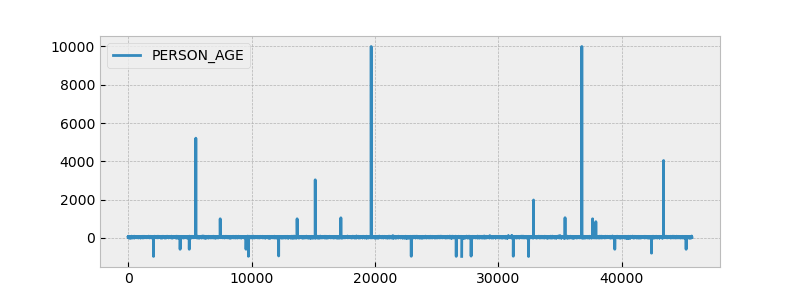

In [167]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('bmh')
age_series.plot(figsize=(8,3))

Filter to ages between 0 and 125?!

Text(0.5, 0, 'index number')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
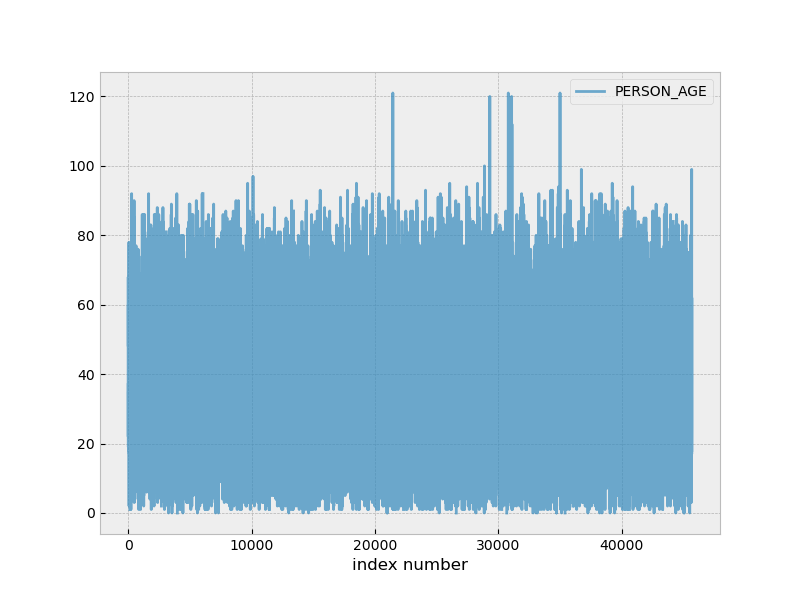

In [168]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
cleaned_age_index = (age_series >= 0) & (age_series <= 125)
cleaned_age_series = age_series[cleaned_age_index]
cleaned_age_series.plot(alpha=0.7, figsize=(8,6))
plt.xlabel('index number')

Let's just see how it's distributed.

In [169]:
age_series

PERSON_AGE
0            37.0
1            26.0
2            22.0
3            68.0
4            22.0
...           ...
45664        22.0
45665        30.0
45666        25.0
45667        62.0
45668        18.0

[45669 rows x 1 columns]

Text(0.5, 0, 'Age')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
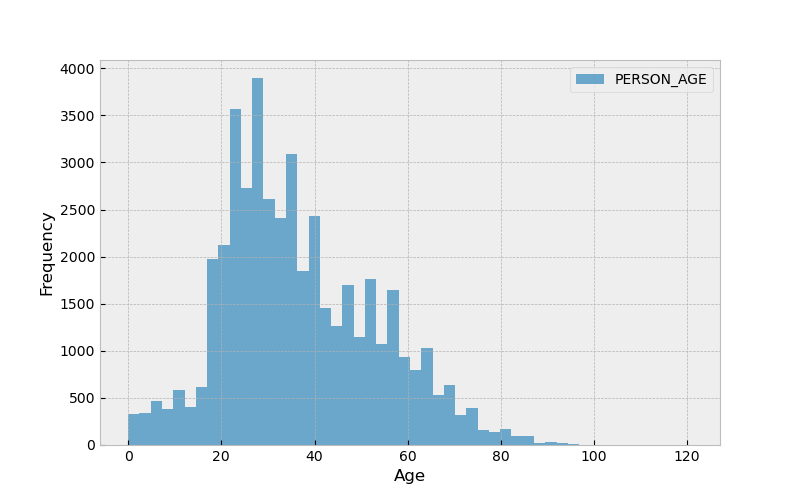

In [172]:
cleaned_age_series.plot.hist(bins=50, alpha=0.7, figsize=(8,5))
plt.xlabel('Age')

In [174]:
range(0,125,1)

range(0, 125)

Text(0.5, 0, 'Age')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
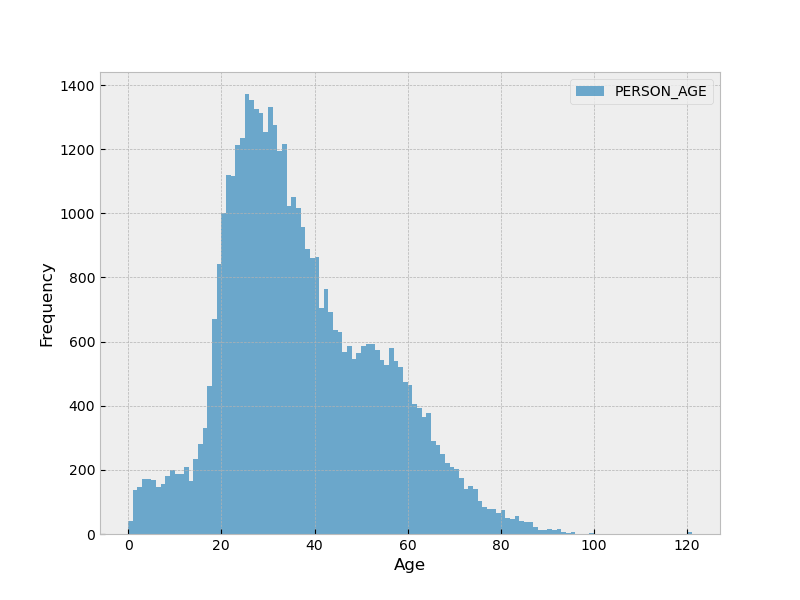

In [175]:
binwidth = 1
cleaned_age_series.plot.hist(bins=range(int(cleaned_age_series.min()[0]),
                                        int(cleaned_age_series.max()[0]) + binwidth, binwidth),
                             alpha=0.7, figsize=(8,6))
plt.xlabel('Age')

But let's see how it's distributed by sex, and thats really easy in pandas by ```.groupby()```

In [176]:
df = data.reset_index().drop(columns=['index'])
df = df[(df.PERSON_AGE <= 125) & (df.PERSON_AGE >= 0)]

In [177]:
grouped = df.groupby('PERSON_SEX')
grouped.get_group('F')

crash_time PERSON_INJURY  PERSON_AGE        BODILY_INJURY  \
3     2021-01-01 00:00:00       Injured        68.0                 Neck   
6     2021-01-01 00:00:00       Injured        24.0        Hip-Upper Leg   
7     2021-01-01 01:00:00       Injured        59.0                 Back   
10    2021-01-01 01:00:00       Injured        19.0                 Head   
18    2021-01-01 02:00:00       Injured        61.0  Knee-Lower Leg Foot   
...                   ...           ...         ...                  ...   
45650 2021-11-16 19:00:00       Injured        35.0        Hip-Upper Leg   
45651 2021-11-16 19:00:00       Injured        22.0                 Back   
45652 2021-11-16 19:00:00       Injured        28.0                 Neck   
45661 2021-11-16 21:00:00       Injured        28.0  Knee-Lower Leg Foot   
45665 2021-11-16 22:00:00       Injured        30.0  Knee-Lower Leg Foot   

                        SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE  \
3                     Lap Belt & Harness          F    Occupant   
6                                    NaN          F  Pedestrian   
7      Air Bag Deployed/Lap Belt/Harness          F    Occupant   
10                                   NaN          F  Pedestrian   
18                                   NaN          F  Pedestrian   
...                                  ...        ...         ...   
45650           Helmet (Motorcycle Only)          F   Bicyclist   
45651                 Lap Belt & Harness          F    Occupant   
45652                           Lap Belt          F    Occupant   
45661                           Lap Belt          F    Occupant   
45665                 Lap Belt & Harness          F    Occupant   

                                            PED_LOCATION  \
3                                                    NaN   
6      Pedestrian/Bicyclist/Other Pedestrian at Inter...   
7                                                    NaN   
10     Pedestrian/Bicyclist/Other Pedestrian at Inter...   
18     Pedestrian/Bicyclist/Other Pedestrian at Inter...   
...                                                  ...   
45650                                                NaN   
45651                                                NaN   
45652                                                NaN   
45661                                                NaN   
45665                                                NaN   

      CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
3                       NaN  Not Ejected  Complaint of Pain or Nausea   
6               Unspecified          NaN  Complaint of Pain or Nausea   
7                       NaN  Not Ejected  Complaint of Pain or Nausea   
10              Unspecified          NaN                 None Visible   
18              Unspecified          NaN  Complaint of Pain or Nausea   
...                     ...          ...                          ...   
45650                   NaN      Ejected  Complaint of Pain or Nausea   
45651                   NaN  Not Ejected  Complaint of Pain or Nausea   
45652                   NaN  Not Ejected                 None Visible   
45661                   NaN  Not Ejected                      Unknown   
45665                   NaN  Not Ejected                     Internal   

      EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
3            Conscious  19821967.0  500d8914-149f-4eed-918f-30664916f21d   
6            Conscious         NaN  8fd675cd-42c7-4726-abd7-df016696363f   
7            Conscious  19942886.0  50004f1d-6594-415e-9ee9-2176079a34b6   
10           Conscious         NaN  b8a36572-df34-4df6-aaab-6a60c124222f   
18           Conscious         NaN  4294b7b4-d6f8-4085-a344-732c19906cee   
...                ...         ...                                   ...   
45650        Conscious  20108651.0  1298364e-53ed-49e9-8391-161f2d78f180   
45651        Conscious  20108706.0  8a0f8cdf-9963-47af-86da-cc2437a736ab   
45652        Co

In [178]:
grouped

In [160]:
df

crash_time PERSON_INJURY  PERSON_AGE         BODILY_INJURY  \
0     2021-01-01 00:00:00       Injured        37.0                  Neck   
1     2021-01-01 00:00:00       Injured        26.0   Knee-Lower Leg Foot   
2     2021-01-01 00:00:00       Injured        22.0                  Neck   
3     2021-01-01 00:00:00       Injured        68.0                  Neck   
4     2021-01-01 00:00:00       Injured        22.0  Shoulder - Upper Arm   
...                   ...           ...         ...                   ...   
45664 2021-11-16 21:00:00       Injured        22.0   Knee-Lower Leg Foot   
45665 2021-11-16 22:00:00       Injured        30.0   Knee-Lower Leg Foot   
45666 2021-11-16 22:00:00       Injured        25.0                  Head   
45667 2021-11-16 22:00:00       Injured        62.0                  Neck   
45668 2021-11-16 22:00:00       Injured        18.0         Hip-Upper Leg   

               SAFETY_EQUIPMENT PERSON_SEX      PERSON_TYPE  \
0            Lap Belt & Harness          M         Occupant   
1      Helmet (Motorcycle Only)          M        Bicyclist   
2            Lap Belt & Harness          M         Occupant   
3            Lap Belt & Harness          F         Occupant   
4            Lap Belt & Harness          M         Occupant   
...                         ...        ...              ...   
45664                       NaN          M       Pedestrian   
45665        Lap Belt & Harness          F         Occupant   
45666                   Unknown          M  Other Motorized   
45667        Lap Belt & Harness          M         Occupant   
45668  Helmet (Motorcycle Only)          M        Bicyclist   

                                            PED_LOCATION  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
45664  Pedestrian/Bicyclist/Other Pedestrian at Inter...   
45665                                                NaN   
45666                                                NaN   
45667                                                NaN   
45668                                                NaN   

      CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
0                       NaN  Not Ejected  Complaint of Pain or Nausea   
1                       NaN  Not Ejected  Complaint of Pain or Nausea   
2                       NaN  Not Ejected  Complaint of Pain or Nausea   
3                       NaN  Not Ejected  Complaint of Pain or Nausea   
4                       NaN  Not Ejected  Complaint of Pain or Nausea   
...                     ...          ...                          ...   
45664           Unspecified          NaN           Contusion - Bruise   
45665                   NaN  Not Ejected                     Internal   
45666                   NaN      Ejected                   Concussion   
45667                   NaN  Not Ejected  Complaint of Pain or Nausea   
45668                   NaN      Ejected  Complaint of Pain or Nausea   

      EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
0            Conscious  19821967.0  06869fa4-85f9-4499-9491-11132224bdce   
1            Conscious  19828916.0  c96a4379-ccc9-4f28-8dec-b883bce16131   
2            Conscious  19824561.0  4932796e-b59d-417f-bafb-3f2c9bbb9e1f   
3            Conscious  19821967.0  500d8914-149f-4eed-918f-30664916f21d   
4            Conscious  19823516.0  1d4a21e7-1ccd-488d-bcfa-5e144a7d9a36   
...                ...         ...                                   ...   
45664        Conscious         NaN  bef7b78f-08f0-4777-ab0a-051bbc66d3dc   
45665        Conscious  20109092.0  b8a51aa1-53c7-4207-80ee-b9d24d7a8c78   
45666        Conscious  20109268.0  15318ca9-4068-4

In [179]:
grouped = df.groupby('PERSON_SEX')

In [180]:
grouped.get_group('M')

crash_time PERSON_INJURY  PERSON_AGE         BODILY_INJURY  \
0     2021-01-01 00:00:00       Injured        37.0                  Neck   
1     2021-01-01 00:00:00       Injured        26.0   Knee-Lower Leg Foot   
2     2021-01-01 00:00:00       Injured        22.0                  Neck   
4     2021-01-01 00:00:00       Injured        22.0  Shoulder - Upper Arm   
5     2021-01-01 00:00:00       Injured        43.0  Elbow-Lower-Arm-Hand   
...                   ...           ...         ...                   ...   
45663 2021-11-16 21:00:00       Injured        37.0   Knee-Lower Leg Foot   
45664 2021-11-16 21:00:00       Injured        22.0   Knee-Lower Leg Foot   
45666 2021-11-16 22:00:00       Injured        25.0                  Head   
45667 2021-11-16 22:00:00       Injured        62.0                  Neck   
45668 2021-11-16 22:00:00       Injured        18.0         Hip-Upper Leg   

                              SAFETY_EQUIPMENT PERSON_SEX      PERSON_TYPE  \
0                           Lap Belt & Harness          M         Occupant   
1                     Helmet (Motorcycle Only)          M        Bicyclist   
2                           Lap Belt & Harness          M         Occupant   
4                           Lap Belt & Harness          M         Occupant   
5                                          NaN          M       Pedestrian   
...                                        ...        ...              ...   
45663  Helmet/Other (In-Line Skater/Bicyclist)          M  Other Motorized   
45664                                      NaN          M       Pedestrian   
45666                                  Unknown          M  Other Motorized   
45667                       Lap Belt & Harness          M         Occupant   
45668                 Helmet (Motorcycle Only)          M        Bicyclist   

                                            PED_LOCATION  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
4                                                    NaN   
5      Pedestrian/Bicyclist/Other Pedestrian at Inter...   
...                                                  ...   
45663                                                NaN   
45664  Pedestrian/Bicyclist/Other Pedestrian at Inter...   
45666                                                NaN   
45667                                                NaN   
45668                                                NaN   

      CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
0                       NaN  Not Ejected  Complaint of Pain or Nausea   
1                       NaN  Not Ejected  Complaint of Pain or Nausea   
2                       NaN  Not Ejected  Complaint of Pain or Nausea   
4                       NaN  Not Ejected  Complaint of Pain or Nausea   
5               Unspecified          NaN               Minor Bleeding   
...                     ...          ...                          ...   
45663                   NaN  Not Ejected  Complaint of Pain or Nausea   
45664           Unspecified          NaN           Contusion - Bruise   
45666                   NaN      Ejected                   Concussion   
45667                   NaN  Not Ejected  Complaint of Pain or Nausea   
45668                   NaN      Ejected  Complaint of Pain or Nausea   

      EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
0            Conscious  19821967.0  06869fa4-85f9-4499-9491-11132224bdce   
1            Conscious  19828916.0  c96a4379-ccc9-4f28-8dec-b883bce16131   
2            Conscious  19824561.0  4932796e-b59d-417f-bafb-3f2c9bbb9e1f   
4            Conscious  19823516.0  1d4a21e7-1ccd-488d-bcfa-5e144a7d9a36   
5            Conscious         NaN  7fe0f832-49c1-4c5c-879e-1e1e98d49b8c   
...                ...         ...                                   ...   
45663        Conscious 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
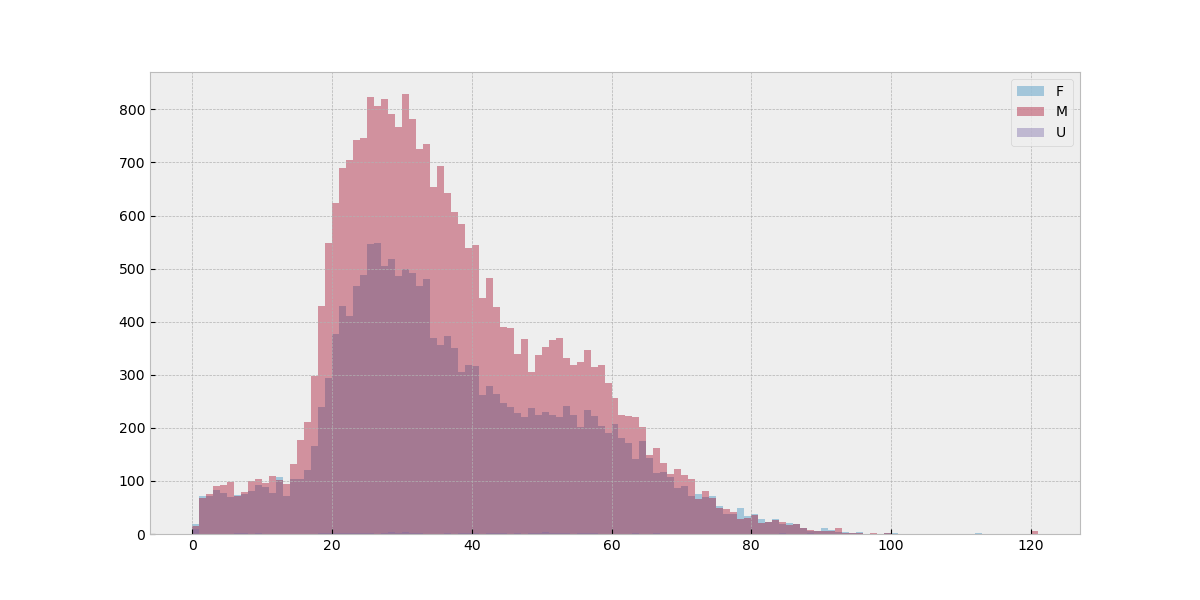

In [181]:
%matplotlib widget
bin_range = range(int(df.PERSON_AGE.min()),
                  int(df.PERSON_AGE.max()) + binwidth, binwidth)

df.groupby('PERSON_SEX')['PERSON_AGE'].hist(bins=bin_range, alpha = 0.4, figsize=(12,6),
                                           legend=True)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
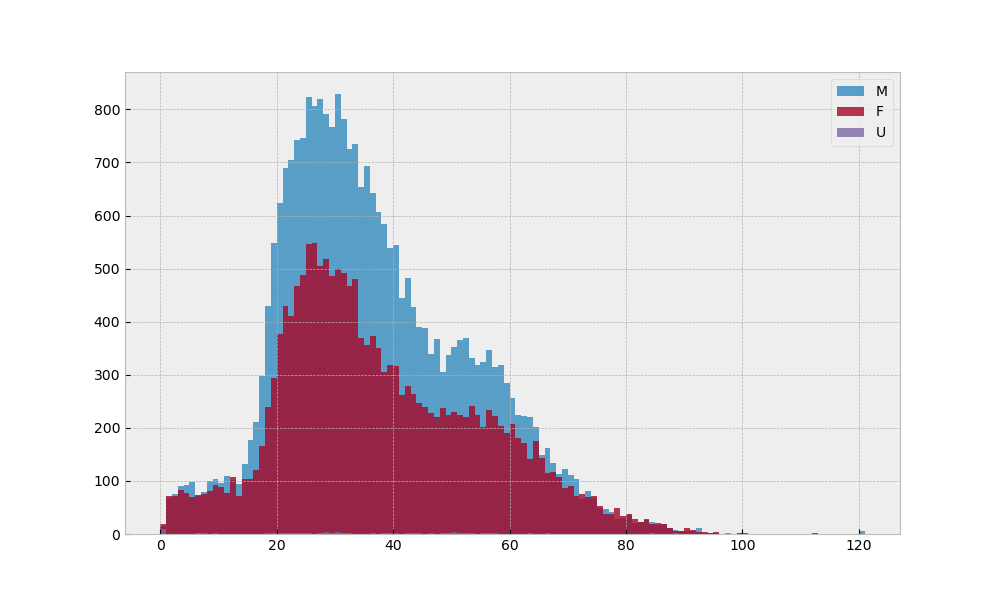

In [184]:
plt.figure()
grouped = df.groupby('PERSON_SEX')

grouped.get_group('M')['PERSON_AGE'].hist(bins=bin_range, alpha = 0.8, figsize=(10,6), label='M')
grouped.get_group('F')['PERSON_AGE'].hist(bins=bin_range, alpha = 0.8, figsize=(10,6), label='F')
grouped.get_group('U')['PERSON_AGE'].hist(bins=bin_range, alpha = 0.8, figsize=(10,6), label='U')
plt.legend()
plt.show()

In [185]:
df.PERSON_AGE.min()

0.0

In [186]:
grouped.describe()

PERSON_AGE                                                      \
                count       mean        std  min   25%   50%   75%    max   
PERSON_SEX                                                                  
F             17846.0  37.290149  17.379710  0.0  25.0  34.0  49.0  112.0   
M             27310.0  36.467265  16.030563  0.0  25.0  34.0  47.0  121.0   
U                63.0  31.666667  20.784610  0.0  20.5  30.0  48.0   88.0   

           VEHICLE_ID                ...    UNIQUE_ID              \
                count          mean  ...          75%         max   
PERSON_SEX                           ...                            
F             14714.0  1.999603e+07  ...  11943518.75  12031463.0   
M             24021.0  1.999698e+07  ...  11944455.25  12031464.0   
U                59.0  2.000415e+07  ...  11959986.50  12026010.0   

           COLLISION_ID                                                     \
                  count          mean           std        min         25%   
PERSON_SEX                                                                   
F               17846.0  4.431443e+06  27571.526783  4380715.0  4408505.25   
M               27310.0  4.431909e+06  27498.573967  4380715.0  4408969.75   
U                  63.0  4.434673e+06  28178.742130  4380764.0  4408651.50   

                                             
                  50%        75%        max  
PERSON_SEX                                   
F           4431855.5  4455048.5  4478829.0  
M           4432645.5  4455522.0  4478832.0  
U           4435959.0  4459025.0  4477139.0  

[3 rows x 32 columns]

In [187]:
df.crash_time.min()

Timestamp('2021-01-01 00:00:00')

In [188]:
df.crash_time.max()

Timestamp('2021-11-16 22:00:00')

In [189]:
(df.crash_time.max()-df.crash_time.min()).days

319

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
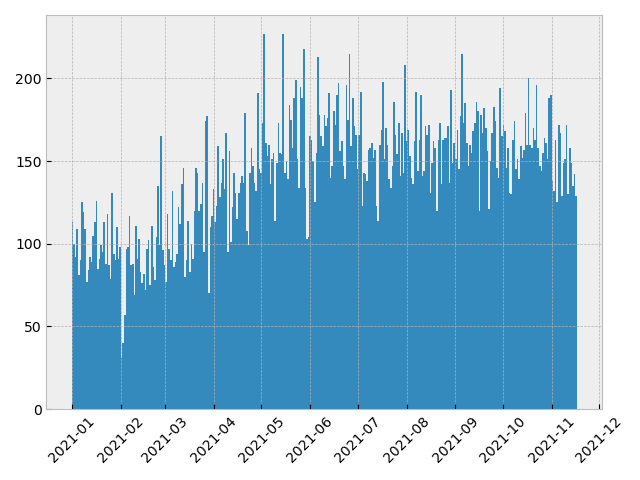

In [190]:
%matplotlib widget
plt.figure()
df.crash_time.hist(bins=(df.crash_time.max()-df.crash_time.min()).days)
plt.xticks(rotation=45)
plt.tight_layout()

There's a lot of research that can be done such a DataFrame, and a lot of questions that can be answered
* Is there a correlation between the persons role in an accident and the sex? $\rightarrow$ ```groupby```
* What can be said about protection gear?
* ...

Hint:
* You probably don't have to write the method by yourself
* If it isn't working, maybe you try too hard

Show over Date and Sex Histogram

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
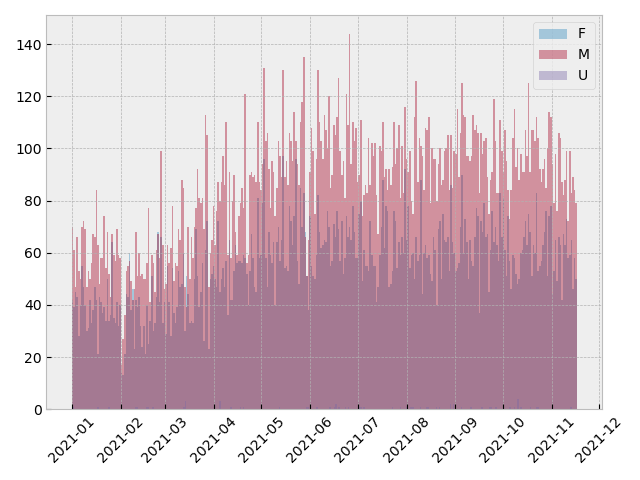

In [191]:
%matplotlib widget
plt.figure()
df.groupby(df['PERSON_SEX']).crash_time.hist(bins=(df.crash_time.max()-df.crash_time.min()).days,
                                             alpha=0.4, legend=True)
plt.xticks(rotation=45)
plt.tight_layout()

In [192]:
s_groups = df.groupby('PERSON_SEX')

In [193]:
s_groups.count()

crash_time  PERSON_INJURY  PERSON_AGE  BODILY_INJURY  \
PERSON_SEX                                                         
F                17846          17846       17846          17846   
M                27310          27310       27310          27310   
U                   63             63          63             63   

            SAFETY_EQUIPMENT  PERSON_TYPE  PED_LOCATION  \
PERSON_SEX                                                
F                      14843        17846          3132   
M                      24223        27310          3289   
U                         59           63             4   

            CONTRIBUTING_FACTOR_2  EJECTION  COMPLAINT  EMOTIONAL_STATUS  \
PERSON_SEX                                                                 
F                            3125     14839      17846             17846   
M                            3272     24223      27310             27310   
U                               4        59         63                63   

            VEHICLE_ID  PERSON_ID  CONTRIBUTING_FACTOR_1  POSITION_IN_VEHICLE  \
PERSON_SEX                                                                      
F                14714      17846                   3127                14847   
M                24021      27310                   3282                24235   
U                   59         63                      4                   59   

            PED_ROLE  UNIQUE_ID  PED_ACTION  COLLISION_ID  
PERSON_SEX                                                 
F              17846      17846        3132         17846  
M              27310      27310        3289         27310  
U                 63         63           4            63

In [194]:
s_groups.get_group('F')['PERSON_TYPE'].value_counts()

Occupant           13819
Pedestrian          3095
Bicyclist            628
Other Motorized      304
Name: PERSON_TYPE, dtype: int64

In [195]:
s_groups.get_group('F')['PERSON_TYPE'].value_counts(normalize=True)

Occupant           0.774347
Pedestrian         0.173428
Bicyclist          0.035190
Other Motorized    0.017035
Name: PERSON_TYPE, dtype: float64

In [196]:
s_groups.get_group('M')['PERSON_TYPE'].value_counts(normalize=True).sort_index()

Bicyclist          0.139876
Occupant           0.686525
Other Motorized    0.057488
Pedestrian         0.116111
Name: PERSON_TYPE, dtype: float64

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
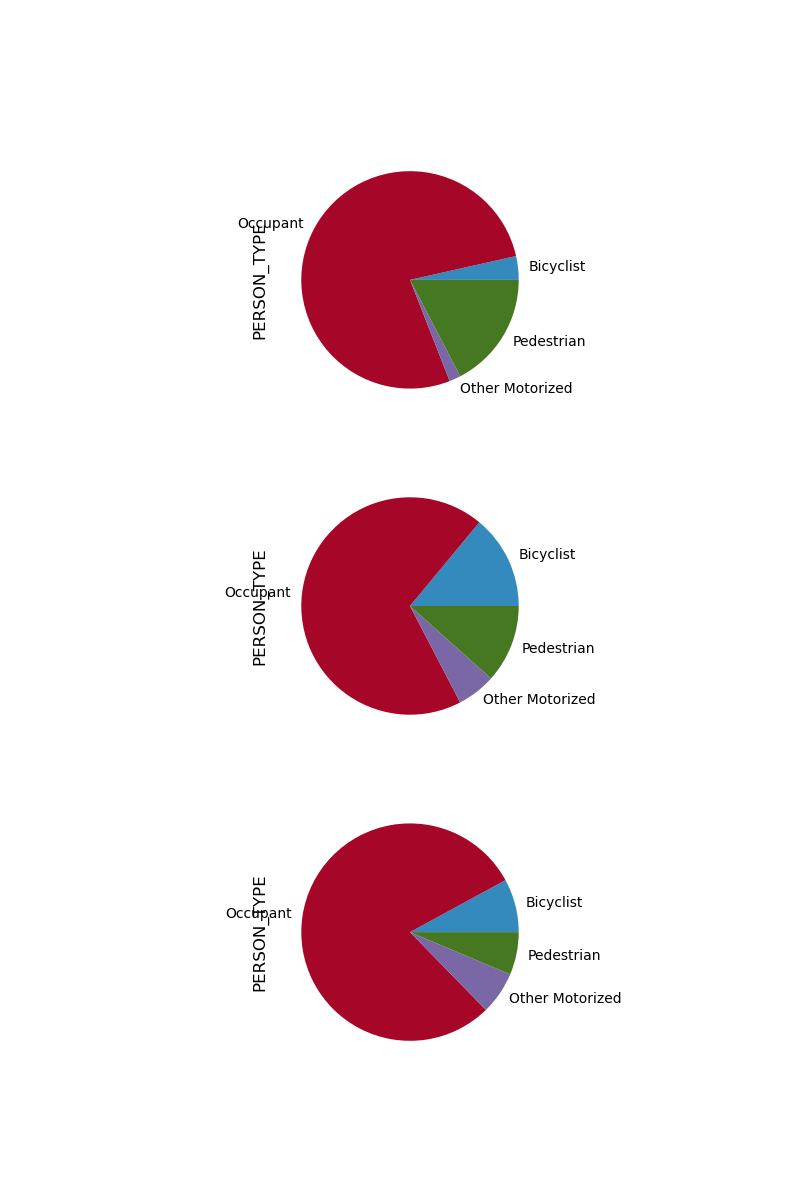

In [197]:
fig = plt.figure(figsize=(8, 12))
for i, group in enumerate(s_groups):
    #print(group)
    plt.subplot(3, 1, i+1)
    group[1]['PERSON_TYPE'].value_counts(normalize=True).sort_index().plot.pie(subplots=True)

### Aggregation

Collect results of different calculations:

In [198]:
df.agg({'PERSON_SEX':'sum'})

PERSON_SEX    MMMFMMFFMMFMMMMMMMFMMMMMMFMMMFMFFMMMFMFUMMMFFF...
dtype: object

### Save ```DataFrames```

In [199]:
df.head()

crash_time PERSON_INJURY  PERSON_AGE         BODILY_INJURY  \
0 2021-01-01       Injured        37.0                  Neck   
1 2021-01-01       Injured        26.0   Knee-Lower Leg Foot   
2 2021-01-01       Injured        22.0                  Neck   
3 2021-01-01       Injured        68.0                  Neck   
4 2021-01-01       Injured        22.0  Shoulder - Upper Arm   

           SAFETY_EQUIPMENT PERSON_SEX PERSON_TYPE PED_LOCATION  \
0        Lap Belt & Harness          M    Occupant          NaN   
1  Helmet (Motorcycle Only)          M   Bicyclist          NaN   
2        Lap Belt & Harness          M    Occupant          NaN   
3        Lap Belt & Harness          F    Occupant          NaN   
4        Lap Belt & Harness          M    Occupant          NaN   

  CONTRIBUTING_FACTOR_2     EJECTION                    COMPLAINT  \
0                   NaN  Not Ejected  Complaint of Pain or Nausea   
1                   NaN  Not Ejected  Complaint of Pain or Nausea   
2                   NaN  Not Ejected  Complaint of Pain or Nausea   
3                   NaN  Not Ejected  Complaint of Pain or Nausea   
4                   NaN  Not Ejected  Complaint of Pain or Nausea   

  EMOTIONAL_STATUS  VEHICLE_ID                             PERSON_ID  \
0        Conscious  19821967.0  06869fa4-85f9-4499-9491-11132224bdce   
1        Conscious  19828916.0  c96a4379-ccc9-4f28-8dec-b883bce16131   
2        Conscious  19824561.0  4932796e-b59d-417f-bafb-3f2c9bbb9e1f   
3        Conscious  19821967.0  500d8914-149f-4eed-918f-30664916f21d   
4        Conscious  19823516.0  1d4a21e7-1ccd-488d-bcfa-5e144a7d9a36   

  CONTRIBUTING_FACTOR_1                                POSITION_IN_VEHICLE  \
0                   NaN                                             Driver   
1                   NaN                                             Driver   
2                   NaN                                             Driver   
3                   NaN  Front passenger, if two or more persons, inclu...   
4                   NaN                                             Driver   

    PED_ROLE  UNIQUE_ID PED_ACTION  COLLISION_ID  
0     Driver   11537291        NaN       4380715  
1     Driver   11549368        NaN       4383570  
2     Driver   11541732        NaN       4381682  
3  Passenger   11537289        NaN       4380715  
4     Driver   11539900        NaN       4381080

In [201]:
df.to_csv('sample_data/new_df.csv')

In [202]:
result = df.to_json('sample_data/new_json.json', orient="index")

# Real World Problems

# Tips and Tricks

In [3]:
import pandas as pd

### Skip specific rows and define a header

In [20]:
df = pd.read_csv('sample_data/continuous_dataset.csv', header=0, skiprows=[3,50])

### Read directly from compressed files or urls

In [17]:
df.to_csv('sample_data/continuous_dataset.zip', compression='zip')

In [19]:
pd.read_csv('sample_data/continuous_dataset.zip', compression='zip')

Unnamed: 0             datetime  nat_demand    T2M_toc  QV2M_toc   TQL_toc  \
0           0  2015-01-03 01:00:00    970.3450  25.865259  0.018576  0.016174   
1           1  2015-01-03 02:00:00    912.1755  25.899255  0.018653  0.016418   
2           2  2015-01-03 04:00:00    889.9538  25.957544  0.018890  0.016273   
3           3  2015-01-03 05:00:00    893.6865  25.973840  0.018981  0.017281   
4           4  2015-01-03 06:00:00    879.2323  26.034143  0.019080  0.014542   

     W2M_toc    T2M_san  QV2M_san   TQL_san    W2M_san    T2M_dav  QV2M_dav  \
0  21.850546  23.482446  0.017272  0.001855  10.328949  22.662134  0.016562   
1  22.166944  23.399255  0.017265  0.001327  10.681517  22.578943  0.016509   
2  22.110481  23.238794  0.017128  0.002599  10.518620  22.512231  0.016487   
3  21.186089  23.075403  0.017059  0.001729   9.733589  22.481653  0.016456   
4  20.062038  22.995081  0.017028  0.001485   9.087273  22.456018  0.016410   

    TQL_dav   W2M_dav  Holiday_ID  holiday  school  
0  0.096100  5.364148           0        0       0  
1  0.087646  5.572471           0        0       0  
2  0.068390  5.883621           0        0       0  
3  0.064362  5.611724           0        0       0  
4  0.061539  5.280351           0        0       0

### Read from multiple files at once

In [21]:
from glob import glob

In [22]:
files = sorted(glob('sample_data/continuous_dataset*.csv'))

In [23]:

files

['sample_data/continuous_dataset 2.csv',
 'sample_data/continuous_dataset.csv',
 'sample_data/continuous_dataset0.csv',
 'sample_data/continuous_dataset1.csv',
 'sample_data/continuous_dataset2.csv']

In [26]:
pd.concat((pd.read_csv(file) for file in files), ignore_index=True).head()

datetime  nat_demand    T2M_toc  QV2M_toc   TQL_toc    W2M_toc  \
0  2015-01-03 01:00:00    970.3450  25.865259  0.018576  0.016174  21.850546   
1  2015-01-03 02:00:00    912.1755  25.899255  0.018653  0.016418  22.166944   
2  2015-01-03 03:00:00    900.2688  25.937280  0.018768  0.015480  22.454911   
3  2015-01-03 04:00:00    889.9538  25.957544  0.018890  0.016273  22.110481   
4  2015-01-03 05:00:00    893.6865  25.973840  0.018981  0.017281  21.186089   

     T2M_san  QV2M_san   TQL_san    W2M_san    T2M_dav  QV2M_dav   TQL_dav  \
0  23.482446  0.017272  0.001855  10.328949  22.662134  0.016562  0.096100   
1  23.399255  0.017265  0.001327  10.681517  22.578943  0.016509  0.087646   
2  23.343530  0.017211  0.001428  10.874924  22.531030  0.016479  0.078735   
3  23.238794  0.017128  0.002599  10.518620  22.512231  0.016487  0.068390   
4  23.075403  0.017059  0.001729   9.733589  22.481653  0.016456  0.064362   

    W2M_dav  Holiday_ID  holiday  school  
0  5.364148           0        0       0  
1  5.572471           0        0       0  
2  5.871184           0        0       0  
3  5.883621           0        0       0  
4  5.611724           0        0       0

### Do the same thing without forgetting from which file the data came

In [27]:
pd.concat((pd.read_csv(file).assign(filename=file) for file in files), ignore_index=True).head()

datetime  nat_demand    T2M_toc  QV2M_toc   TQL_toc    W2M_toc  \
0  2015-01-03 01:00:00    970.3450  25.865259  0.018576  0.016174  21.850546   
1  2015-01-03 02:00:00    912.1755  25.899255  0.018653  0.016418  22.166944   
2  2015-01-03 03:00:00    900.2688  25.937280  0.018768  0.015480  22.454911   
3  2015-01-03 04:00:00    889.9538  25.957544  0.018890  0.016273  22.110481   
4  2015-01-03 05:00:00    893.6865  25.973840  0.018981  0.017281  21.186089   

     T2M_san  QV2M_san   TQL_san    W2M_san    T2M_dav  QV2M_dav   TQL_dav  \
0  23.482446  0.017272  0.001855  10.328949  22.662134  0.016562  0.096100   
1  23.399255  0.017265  0.001327  10.681517  22.578943  0.016509  0.087646   
2  23.343530  0.017211  0.001428  10.874924  22.531030  0.016479  0.078735   
3  23.238794  0.017128  0.002599  10.518620  22.512231  0.016487  0.068390   
4  23.075403  0.017059  0.001729   9.733589  22.481653  0.016456  0.064362   

    W2M_dav  Holiday_ID  holiday  school                              filename  
0  5.364148           0        0       0  sample_data/continuous_dataset 2.csv  
1  5.572471           0        0       0  sample_data/continuous_dataset 2.csv  
2  5.871184           0        0       0  sample_data/continuous_dataset 2.csv  
3  5.883621           0        0       0  sample_data/continuous_dataset 2.csv  
4  5.611724           0        0       0  sample_data/continuous_dataset 2.csv

### Skip rows intentionally to get a rough insight in big files

In [30]:
import numpy as np

df = pd.read_csv('sample_data/continuous_dataset.csv', skiprows= lambda x: x > 0 and np.random.rand() > 0.01)

### Read data from clipboard

In [31]:
pd.read_clipboard()

21:00  Killed  62.0         Head          Unnamed: 4
0    0:00  Killed  24.0  Entire Body    Air Bag Deployed
1    2:00  Killed  30.0         Head                None
2   13:00  Killed  71.0         Head                 NaN
3   22:00  Killed  69.0  Entire Body                 NaN
4   23:00  Killed  43.0         Head                 NaN
5   15:00  Killed  81.0  Entire Body                 NaN
6   19:00  Killed  60.0        Chest                 NaN
7   14:00  Killed  52.0  Entire Body             Unknown
8   23:00  Killed  21.0         Head  Lap Belt & Harness
9   16:00  Killed  57.0      Unknown  Lap Belt & Harness
10  19:00  Killed  33.0         Head                None

### Read from url 

In [34]:
pd.read_html('https://www.honda.de/cars/dealer-list.html')

[                              Händler Name   Händler Standort
 0       AC Automobil Center GmbH Altenburg          Altenburg
 1    AC Grimmen GmbH & Co. Autovertrieb KG            Grimmen
 2                     AK Autohaus Weh GmbH     Kempten/Allgäu
 3                       AM-Automobile GmbH         Kaufbeuren
 4              Aurego GmbH, Abt. Honda PKW          Wuppertal
 ..                                     ...                ...
 257             Westerwald Automobile GmbH  Ransbach-Baumbach
 258                          Wiesböck GmbH          Rosenheim
 259                     Willi Fladung GmbH  Dreieich-Sprendl.
 260                     Wolfgang Althammer               Cham
 261                 autoForum Wiegers GmbH   Porta Westfalica
 
 [262 rows x 2 columns]]

### Create DataFrame for testing

In [37]:
pd.util.testing.makeDataFrame()

A         B         C         D
Pp9VswBQE1 -1.112972  0.235394 -0.076670  0.897882
MFdAlVnLAv  0.413103 -1.353411  0.118838 -1.532492
Gkevp5gNAt -0.220936 -2.571118  0.084836 -1.420112
bOQKp3ykff -0.934071  1.831931 -0.652379 -1.915230
6VcG1LbCkP  1.520548  0.011262 -0.786742  2.825082
GDGWoO0XQu -0.994437  0.385156 -0.192354  0.192130
whCZ6fOlw9 -0.350589 -1.657334  0.728490 -0.295817
Dce5xwtXLn  3.264158 -0.995132 -1.251663 -0.622708
L660FVoAeR -0.449934 -2.097275  1.053745 -0.707486
Ushhceq9nU  0.050591  0.486079  1.536565  1.376564
5xGlBjm5jn -0.768790  0.506200 -0.323046  0.216998
s7Q0XMOvPn -0.651949  0.524377  0.669298 -0.070700
HTredVlrNI -0.539052  1.194472  0.861426  0.447676
hrLOKmchTl -1.451901  0.976750 -1.005332 -0.191881
4fCcpM5caQ  1.164339 -0.794252 -1.091194 -0.053614
SVofOgveCe  1.260657 -2.834840 -0.219156  0.573637
4iQJAXeQv3  0.906771 -0.547908 -1.863910  0.689803
H2NcPPxXJi  0.113853  0.461297  0.883915 -0.977472
GFLJJrcQ51  0.908622  0.818736 -0.720622  0.470909
wUrHYaFQoC  0.636762  0.449155  1.019028  1.440246
WYPaRtboWt  0.233205 -0.057335  0.209919 -1.027422
5M4JtQo44g -0.556219 -0.226898  1.548157 -2.244098
ZeggEeAobX -0.732234  1.808217 -0.860917  0.324051
BeMCOvZzk2  0.284936  0.670699  1.305053  0.315520
Jlym9o3ZbK  2.006524 -0.354466 -0.982841  1.428326
ttUs4iQj0U -0.369987  0.698301 -0.030515  2.193664
4aCN9Prt2B  0.605993 -0.886165 -1.185035  0.436830
g0b05H79XS -0.938527  0.765018  2.272232  1.193133
IozFjzb3rA  0.397632 -0.219640  0.646927  0.720852
YNxfOpLucn  0.963191  0.393346  2.030079  0.767477

In [39]:
df = pd.util.testing.makeTimeDataFrame()

In [40]:
df

A         B         C         D
2000-01-03  3.360336  0.369220  1.303437 -0.950988
2000-01-04 -0.424735 -0.696668  0.826119 -0.443295
2000-01-05  1.188522 -0.363460  1.505659 -0.653874
2000-01-06 -1.460783 -1.313543  0.352270  1.982510
2000-01-07 -1.563203 -1.004932  0.979272 -1.032560
2000-01-10  1.184645  0.300121 -0.007555  0.835095
2000-01-11 -0.227736 -0.504748 -1.294505  1.765237
2000-01-12  1.239888 -0.192182  0.148710  0.003521
2000-01-13 -0.429719  2.522584  2.604150  0.783123
2000-01-14 -1.210061 -0.690759  0.511026 -0.819708
2000-01-17  0.855605  0.093210 -0.849483 -0.036281
2000-01-18  0.111130 -1.518866  1.279929  2.650605
2000-01-19 -2.257558  1.635072 -0.487608  0.996463
2000-01-20  0.331873  1.287528  1.108223 -1.042512
2000-01-21  0.919324  0.878692 -0.599514 -1.454755
2000-01-24 -0.176462 -0.764632  0.866424 -0.289291
2000-01-25 -0.727908 -0.123016  1.098398 -0.548828
2000-01-26 -1.165725 -0.782529  0.342007 -0.522040
2000-01-27 -0.446902 -0.216223 -0.043684 -0.051099
2000-01-28 -0.451837  1.024364 -0.931478  1.650159
2000-01-31  1.015370  0.157167  0.290372  0.274673
2000-02-01 -0.295727 -2.258921  1.309303  0.481876
2000-02-02  0.968909  0.485058  0.535049 -0.421312
2000-02-03  0.479794  1.550558  1.829103 -0.404290
2000-02-04 -0.327440 -0.829212 -0.499521 -0.354378
2000-02-07  1.256197  1.108499  0.432364  3.138835
2000-02-08  0.279523 -2.107302 -0.490236 -0.576738
2000-02-09 -0.552061  0.963750  0.347957  0.619721
2000-02-10  0.571789  0.362226  0.210010 -1.272479
2000-02-11 -0.510191  1.091584 -0.730813  0.339364

### pop Series if needed

In [43]:
b = df.pop('B')

In [44]:
df

C         D
2000-01-03  1.303437 -0.950988
2000-01-04  0.826119 -0.443295
2000-01-05  1.505659 -0.653874
2000-01-06  0.352270  1.982510
2000-01-07  0.979272 -1.032560
2000-01-10 -0.007555  0.835095
2000-01-11 -1.294505  1.765237
2000-01-12  0.148710  0.003521
2000-01-13  2.604150  0.783123
2000-01-14  0.511026 -0.819708
2000-01-17 -0.849483 -0.036281
2000-01-18  1.279929  2.650605
2000-01-19 -0.487608  0.996463
2000-01-20  1.108223 -1.042512
2000-01-21 -0.599514 -1.454755
2000-01-24  0.866424 -0.289291
2000-01-25  1.098398 -0.548828
2000-01-26  0.342007 -0.522040
2000-01-27 -0.043684 -0.051099
2000-01-28 -0.931478  1.650159
2000-01-31  0.290372  0.274673
2000-02-01  1.309303  0.481876
2000-02-02  0.535049 -0.421312
2000-02-03  1.829103 -0.404290
2000-02-04 -0.499521 -0.354378
2000-02-07  0.432364  3.138835
2000-02-08 -0.490236 -0.576738
2000-02-09  0.347957  0.619721
2000-02-10  0.210010 -1.272479
2000-02-11 -0.730813  0.339364

### Insert Series at specific position 

In [48]:
df.insert(2, 'C8', b*2)

ValueError: cannot insert C8, already exists

In [49]:
df

C         D        C8
2000-01-03  1.303437 -0.950988  0.738440
2000-01-04  0.826119 -0.443295 -1.393336
2000-01-05  1.505659 -0.653874 -0.726921
2000-01-06  0.352270  1.982510 -2.627087
2000-01-07  0.979272 -1.032560 -2.009865
2000-01-10 -0.007555  0.835095  0.600243
2000-01-11 -1.294505  1.765237 -1.009497
2000-01-12  0.148710  0.003521 -0.384364
2000-01-13  2.604150  0.783123  5.045168
2000-01-14  0.511026 -0.819708 -1.381517
2000-01-17 -0.849483 -0.036281  0.186419
2000-01-18  1.279929  2.650605 -3.037733
2000-01-19 -0.487608  0.996463  3.270143
2000-01-20  1.108223 -1.042512  2.575057
2000-01-21 -0.599514 -1.454755  1.757385
2000-01-24  0.866424 -0.289291 -1.529263
2000-01-25  1.098398 -0.548828 -0.246032
2000-01-26  0.342007 -0.522040 -1.565058
2000-01-27 -0.043684 -0.051099 -0.432446
2000-01-28 -0.931478  1.650159  2.048728
2000-01-31  0.290372  0.274673  0.314335
2000-02-01  1.309303  0.481876 -4.517843
2000-02-02  0.535049 -0.421312  0.970116
2000-02-03  1.829103 -0.404290  3.101117
2000-02-04 -0.499521 -0.354378 -1.658423
2000-02-07  0.432364  3.138835  2.216999
2000-02-08 -0.490236 -0.576738 -4.214604
2000-02-09  0.347957  0.619721  1.927500
2000-02-10  0.210010 -1.272479  0.724451
2000-02-11 -0.730813  0.339364  2.183167

### Change column names 

In [52]:
df.rename({'C':'First'}, axis='columns')

First         D        C8
2000-01-03  1.303437 -0.950988  0.738440
2000-01-04  0.826119 -0.443295 -1.393336
2000-01-05  1.505659 -0.653874 -0.726921
2000-01-06  0.352270  1.982510 -2.627087
2000-01-07  0.979272 -1.032560 -2.009865
2000-01-10 -0.007555  0.835095  0.600243
2000-01-11 -1.294505  1.765237 -1.009497
2000-01-12  0.148710  0.003521 -0.384364
2000-01-13  2.604150  0.783123  5.045168
2000-01-14  0.511026 -0.819708 -1.381517
2000-01-17 -0.849483 -0.036281  0.186419
2000-01-18  1.279929  2.650605 -3.037733
2000-01-19 -0.487608  0.996463  3.270143
2000-01-20  1.108223 -1.042512  2.575057
2000-01-21 -0.599514 -1.454755  1.757385
2000-01-24  0.866424 -0.289291 -1.529263
2000-01-25  1.098398 -0.548828 -0.246032
2000-01-26  0.342007 -0.522040 -1.565058
2000-01-27 -0.043684 -0.051099 -0.432446
2000-01-28 -0.931478  1.650159  2.048728
2000-01-31  0.290372  0.274673  0.314335
2000-02-01  1.309303  0.481876 -4.517843
2000-02-02  0.535049 -0.421312  0.970116
2000-02-03  1.829103 -0.404290  3.101117
2000-02-04 -0.499521 -0.354378 -1.658423
2000-02-07  0.432364  3.138835  2.216999
2000-02-08 -0.490236 -0.576738 -4.214604
2000-02-09  0.347957  0.619721  1.927500
2000-02-10  0.210010 -1.272479  0.724451
2000-02-11 -0.730813  0.339364  2.183167

In [57]:
df.add_suffix('0')

C0        D0       C80
2000-01-03  1.303437 -0.950988  0.738440
2000-01-04  0.826119 -0.443295 -1.393336
2000-01-05  1.505659 -0.653874 -0.726921
2000-01-06  0.352270  1.982510 -2.627087
2000-01-07  0.979272 -1.032560 -2.009865
2000-01-10 -0.007555  0.835095  0.600243
2000-01-11 -1.294505  1.765237 -1.009497
2000-01-12  0.148710  0.003521 -0.384364
2000-01-13  2.604150  0.783123  5.045168
2000-01-14  0.511026 -0.819708 -1.381517
2000-01-17 -0.849483 -0.036281  0.186419
2000-01-18  1.279929  2.650605 -3.037733
2000-01-19 -0.487608  0.996463  3.270143
2000-01-20  1.108223 -1.042512  2.575057
2000-01-21 -0.599514 -1.454755  1.757385
2000-01-24  0.866424 -0.289291 -1.529263
2000-01-25  1.098398 -0.548828 -0.246032
2000-01-26  0.342007 -0.522040 -1.565058
2000-01-27 -0.043684 -0.051099 -0.432446
2000-01-28 -0.931478  1.650159  2.048728
2000-01-31  0.290372  0.274673  0.314335
2000-02-01  1.309303  0.481876 -4.517843
2000-02-02  0.535049 -0.421312  0.970116
2000-02-03  1.829103 -0.404290  3.101117
2000-02-04 -0.499521 -0.354378 -1.658423
2000-02-07  0.432364  3.138835  2.216999
2000-02-08 -0.490236 -0.576738 -4.214604
2000-02-09  0.347957  0.619721  1.927500
2000-02-10  0.210010 -1.272479  0.724451
2000-02-11 -0.730813  0.339364  2.183167

In [60]:
df.columns = df.columns.str.replace('0','1')

In [61]:
df

C         D        C8
2000-01-03  1.303437 -0.950988  0.738440
2000-01-04  0.826119 -0.443295 -1.393336
2000-01-05  1.505659 -0.653874 -0.726921
2000-01-06  0.352270  1.982510 -2.627087
2000-01-07  0.979272 -1.032560 -2.009865
2000-01-10 -0.007555  0.835095  0.600243
2000-01-11 -1.294505  1.765237 -1.009497
2000-01-12  0.148710  0.003521 -0.384364
2000-01-13  2.604150  0.783123  5.045168
2000-01-14  0.511026 -0.819708 -1.381517
2000-01-17 -0.849483 -0.036281  0.186419
2000-01-18  1.279929  2.650605 -3.037733
2000-01-19 -0.487608  0.996463  3.270143
2000-01-20  1.108223 -1.042512  2.575057
2000-01-21 -0.599514 -1.454755  1.757385
2000-01-24  0.866424 -0.289291 -1.529263
2000-01-25  1.098398 -0.548828 -0.246032
2000-01-26  0.342007 -0.522040 -1.565058
2000-01-27 -0.043684 -0.051099 -0.432446
2000-01-28 -0.931478  1.650159  2.048728
2000-01-31  0.290372  0.274673  0.314335
2000-02-01  1.309303  0.481876 -4.517843
2000-02-02  0.535049 -0.421312  0.970116
2000-02-03  1.829103 -0.404290  3.101117
2000-02-04 -0.499521 -0.354378 -1.658423
2000-02-07  0.432364  3.138835  2.216999
2000-02-08 -0.490236 -0.576738 -4.214604
2000-02-09  0.347957  0.619721  1.927500
2000-02-10  0.210010 -1.272479  0.724451
2000-02-11 -0.730813  0.339364  2.183167

### Data encoding: use cut

In [71]:
df = pd.DataFrame(np.random.randint(0,120,size=(100, 1)), columns=['age'])

In [75]:
df['age_groups'] = pd.cut(df.age, bins=[0, 18, 65, 130], labels=['child', 'adult', 'elderly'])

In [76]:
df

age age_groups
0    83    elderly
1    13      child
2    89    elderly
3    22      adult
4    98    elderly
..  ...        ...
95   27      adult
96  116    elderly
97   74    elderly
98   43      adult
99   91    elderly

[100 rows x 2 columns]

In [77]:
pd.get_dummies(df)

age  age_groups_child  age_groups_adult  age_groups_elderly
0    83                 0                 0                   1
1    13                 1                 0                   0
2    89                 0                 0                   1
3    22                 0                 1                   0
4    98                 0                 0                   1
..  ...               ...               ...                 ...
95   27                 0                 1                   0
96  116                 0                 0                   1
97   74                 0                 0                   1
98   43                 0                 1                   0
99   91                 0                 0                   1

[100 rows x 4 columns]

### Free trapped data

In [78]:
df = pd.DataFrame({'A':[1,2,3,4], 'B': [[1,2],[3,4],[5,6],[7,8]]})

In [79]:
df

A       B
0  1  [1, 2]
1  2  [3, 4]
2  3  [5, 6]
3  4  [7, 8]

In [81]:
df.B.apply(pd.Series)

0  1
0  1  2
1  3  4
2  5  6
3  7  8

### Explode

In [83]:
df = pd.DataFrame({'team': [['A', 'B', 'C'], ['D', 'E', 'F'], ['G', 'H', 'I']],
                   'position':['Guard', 'Forward', 'Center'],
                   'points': [7, 14, 19]})

In [84]:
df

team position  points
0  [A, B, C]    Guard       7
1  [D, E, F]  Forward      14
2  [G, H, I]   Center      19

In [87]:
df.explode('team')

team position  points
0    A    Guard       7
0    B    Guard       7
0    C    Guard       7
1    D  Forward      14
1    E  Forward      14
1    F  Forward      14
2    G   Center      19
2    H   Center      19
2    I   Center      19

### dd